In [3]:
from qiskit import *
from qhomer.pngTools import *
from qiskit.chemistry import set_qiskit_chemistry_logging
import logging
import math 
from qiskit.aqua.components.optimizers import L_BFGS_B
import numpy as np
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.variational_forms import RYRZ
import logging
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.operators import MatrixOperator
def diagonalize(self, k):
   exact_eigensolver = ExactEigensolver(self, k=k)
   return(exact_eigensolver.run())
MatrixOperator.diagonalize = diagonalize

In [4]:
def HAMILTON_FUNCTION(filename):
    
    psi = rgbImage2grayVector(read(filename))
    # psi = np.sqrt(tmp)
    norm = np.linalg.norm(psi,2)
    psi0 = psi/norm
    print(psi0, "psi0")
    #nextpowerof2 = 2**(math.ceil(math.log2(len(psi0))))
    
    DiagVector = np.transpose([psi0])
    
    Hemiltonian = -(np.kron(DiagVector,psi0))
   
    print(Hemiltonian, "hemiltonian")
    
    
    HamiltOP = MatrixOperator(Hemiltonian)
    return HamiltOP

In [19]:
def QHOMER_VQE(HamiltOP, n_qubits):
   
    backend = Aer.get_backend('statevector_simulator')
    
    optimizer = L_BFGS_B(maxfun=10000)

    
    var_form = RYRZ(n_qubits, depth = 3)
    set_qiskit_chemistry_logging(logging.INFO)
    print(var_form.num_parameters)
    set_qiskit_chemistry_logging(logging.INFO)
    algorithm = VQE(HamiltOP, var_form, optimizer, operator_mode='matrix')
    
    result = algorithm.run(backend)
    
    return result


In [20]:
img = 'qhomer/Resources/test_4x4.png'
arrayofnums = rgbImage2grayVector(read(img))
num_qubits = int(math.log2(len(arrayofnums)))
Hamiltop = HAMILTON_FUNCTION(img)
RES = QHOMER_VQE(Hamiltop, num_qubits)
sv1 = RES['min_vector']
print("ground state", np.abs(sv1))

#amp1 = np.zeros(2**num_qubits)
#for i in range(2**num_qubits):
 #   amp1[i]=np.conj(sv1[i])*sv1[1]
#print(amp1)


F:\Anaconda\lib\site-packages\qiskit\aqua\algorithms\adaptive\vqe\vqe.py:105: DeprecationWarning: operator_mode option is deprecated and it will be removed after 0.6. Now the operator has its own mode, no need extra info to tell the VQE.
  "Now the operator has its own mode, no need extra info to tell the VQE.", DeprecationWarning)
2019-09-14 11:33:57,725:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: 
==================== Setting of VQE ============================
Algorithm: VQE
-- quantum_instance: None
-- var_form: <qiskit.aqua.components.variational_forms.ryrz.RYRZ object at 0x0000025C7D2D0978>
-- optimizer: <qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B object at 0x0000025C7D042080>
-- cost_fn: <bound method VQE._energy_evaluation of <qiskit.aqua.algorithms.adaptive.vqe.vqe.VQE object at 0x0000025C7D2A0550>>
-- initial_point: Random seed
-- callback: None
-- operator: Representation: matrix, qubits: 4, size: 16x16
-- eval_count: 0
-- aux_operators: []
-- auto_conversion: Tru

[0.21911679 0.30911118 0.33258798 0.09651573 0.07303893 0.30258985
 0.04564933 0.29606852 0.31563251 0.07564746 0.30519838 0.28302585
 0.33258798 0.25824479 0.28824292 0.10434133] psi0
[[-0.04801217 -0.06773145 -0.07287561 -0.02114822 -0.01600406 -0.06630252
  -0.01000254 -0.06487358 -0.06916038 -0.01657563 -0.06687409 -0.06201572
  -0.07287561 -0.05658577 -0.06315886 -0.02286294]
 [-0.06773145 -0.09554972 -0.10280666 -0.02983409 -0.02257715 -0.09353391
  -0.01411072 -0.09151809 -0.09756554 -0.02338348 -0.09434023 -0.08748645
  -0.10280666 -0.07982635 -0.08909911 -0.03225307]
 [-0.07287561 -0.10280666 -0.11061476 -0.03209997 -0.02429187 -0.10063775
  -0.01518242 -0.09846883 -0.10497558 -0.02515944 -0.10150531 -0.094131
  -0.11061476 -0.08588911 -0.09586613 -0.03470267]
 [-0.02114822 -0.02983409 -0.03209997 -0.00931529 -0.00704941 -0.02920468
  -0.00440588 -0.02857527 -0.0304635  -0.00730117 -0.02945644 -0.02731645
  -0.03209997 -0.02492468 -0.02781998 -0.01007058]
 [-0.01600406 -0.0225

2019-09-14 11:33:57,979:qiskit.aqua.algorithms.adaptive.vq_algorithm:INFO: Starting optimizer.
bounds=[(-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.1415926535897

2019-09-14 11:34:08,006:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 54 returned -0.011628193587176556
2019-09-14 11:34:08,182:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 55 returned -0.011628193229899605
2019-09-14 11:34:08,374:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 56 returned -0.011628193051569122
2019-09-14 11:34:08,588:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 57 returned -0.011628193159590716
2019-09-14 11:34:08,773:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 58 returned -0.011628193313364612
2019-09-14 11:34:08,979:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 59 returned -0.011628192985330695
2019-09-14 11:34:09,374:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 60 returned -0.011628193098554365
2019-09-14 11:34:09,790:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 61 returned -0.011628193503429095
2019-09-14 11:34:09,920:

2019-09-14 11:34:22,592:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 122 returned -0.1100023129105298
2019-09-14 11:34:22,835:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 123 returned -0.11000231334494007
2019-09-14 11:34:23,137:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 124 returned -0.11000231352597405
2019-09-14 11:34:23,324:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 125 returned -0.11000231234348799
2019-09-14 11:34:23,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 126 returned -0.11000231299438318
2019-09-14 11:34:23,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 127 returned -0.11000231388903305
2019-09-14 11:34:23,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 128 returned -0.11000231215402845
2019-09-14 11:34:24,033:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 129 returned -0.1100023132638646
2019-09-14 11:34:24,207:qi

2019-09-14 11:34:34,863:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 190 returned -0.38159382188365437
2019-09-14 11:34:35,020:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 191 returned -0.381593819857189
2019-09-14 11:34:35,263:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 192 returned -0.38159382144104687
2019-09-14 11:34:35,436:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 193 returned -0.381593822185841
2019-09-14 11:34:35,601:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 194 returned -0.3815938205013088
2019-09-14 11:34:35,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 195 returned -0.38159382203332265
2019-09-14 11:34:35,890:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 196 returned -0.3815938219481512
2019-09-14 11:34:36,016:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 197 returned -0.38159382175914897
2019-09-14 11:34:36,146:qiskit

2019-09-14 11:34:46,125:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 258 returned -0.6077543427221099
2019-09-14 11:34:46,301:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 259 returned -0.6077543425952052
2019-09-14 11:34:46,484:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 260 returned -0.6077543437430123
2019-09-14 11:34:46,673:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 261 returned -0.6077543426479932
2019-09-14 11:34:46,835:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 262 returned -0.6077543428957073
2019-09-14 11:34:46,986:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 263 returned -0.6077543415563055
2019-09-14 11:34:47,245:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 264 returned -0.6077543432841251
2019-09-14 11:34:47,419:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 265 returned -0.8356261197143158
2019-09-14 11:34:47,585:qiskit.a

2019-09-14 11:34:58,237:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 326 returned -0.8766826446070398
2019-09-14 11:34:58,414:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 327 returned -0.8766826453435472
2019-09-14 11:34:58,664:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 328 returned -0.8766826450642698
2019-09-14 11:34:59,000:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 329 returned -0.8766826450592122
2019-09-14 11:34:59,302:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 330 returned -0.876682644672147
2019-09-14 11:34:59,543:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 331 returned -0.8886974005054563
2019-09-14 11:34:59,765:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 332 returned -0.8886974007819677
2019-09-14 11:34:59,899:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 333 returned -0.8886974004314406
2019-09-14 11:35:00,033:qiskit.aq

2019-09-14 11:35:11,795:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 394 returned -0.8961936400093793
2019-09-14 11:35:11,987:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 395 returned -0.8961936400971726
2019-09-14 11:35:12,107:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 396 returned -0.8961936398910975
2019-09-14 11:35:12,270:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 397 returned -0.898917020673436
2019-09-14 11:35:12,466:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 398 returned -0.8989170206213052
2019-09-14 11:35:12,667:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 399 returned -0.8989170206696828
2019-09-14 11:35:12,828:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 400 returned -0.8989170208235543
2019-09-14 11:35:13,003:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 401 returned -0.898917020660391
2019-09-14 11:35:13,171:qiskit.aqu

2019-09-14 11:35:23,677:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 462 returned -0.9050596886708066
2019-09-14 11:35:23,832:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 463 returned -0.9131338669995087
2019-09-14 11:35:23,955:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 464 returned -0.9131338665906901
2019-09-14 11:35:24,090:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 465 returned -0.9131338667796142
2019-09-14 11:35:24,246:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 466 returned -0.913133867453804
2019-09-14 11:35:24,531:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 467 returned -0.9131338671794399
2019-09-14 11:35:24,692:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 468 returned -0.9131338669961788
2019-09-14 11:35:24,885:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 469 returned -0.9131338669464745
2019-09-14 11:35:25,065:qiskit.aq

2019-09-14 11:35:35,466:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 530 returned -0.9326488233936931
2019-09-14 11:35:35,649:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 531 returned -0.9326488233296656
2019-09-14 11:35:35,806:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 532 returned -0.9326488235975843
2019-09-14 11:35:35,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 533 returned -0.9326488234850365
2019-09-14 11:35:36,040:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 534 returned -0.9326488234393444
2019-09-14 11:35:36,194:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 535 returned -0.9326488234944315
2019-09-14 11:35:36,390:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 536 returned -0.932648823626234
2019-09-14 11:35:36,576:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 537 returned -0.9326488236639946
2019-09-14 11:35:36,729:qiskit.aq

2019-09-14 11:35:47,050:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 598 returned -0.94126817336117
2019-09-14 11:35:47,208:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 599 returned -0.9412681732626206
2019-09-14 11:35:47,389:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 600 returned -0.9412681733222438
2019-09-14 11:35:47,573:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 601 returned -0.9412681733256022
2019-09-14 11:35:47,758:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 602 returned -0.941268173528212
2019-09-14 11:35:47,905:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 603 returned -0.9412681732968896
2019-09-14 11:35:48,029:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 604 returned -0.9412681733461333
2019-09-14 11:35:48,161:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 605 returned -0.9412681734015897
2019-09-14 11:35:48,295:qiskit.aqua

2019-09-14 11:35:59,557:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 666 returned -0.9460214295368999
2019-09-14 11:35:59,721:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 667 returned -0.9460214296128019
2019-09-14 11:35:59,839:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 668 returned -0.9460214295158149
2019-09-14 11:35:59,966:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 669 returned -0.9460214296661038
2019-09-14 11:36:00,161:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 670 returned -0.9460214295505582
2019-09-14 11:36:00,341:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 671 returned -0.9460214295437446
2019-09-14 11:36:00,537:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 672 returned -0.9460214296489271
2019-09-14 11:36:00,720:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 673 returned -0.946021429630404
2019-09-14 11:36:00,889:qiskit.aq

2019-09-14 11:36:11,320:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 734 returned -0.9481162656249141
2019-09-14 11:36:11,534:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 735 returned -0.948116265612525
2019-09-14 11:36:11,717:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 736 returned -0.9481162656502508
2019-09-14 11:36:11,865:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 737 returned -0.9481162656627865
2019-09-14 11:36:11,986:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 738 returned -0.9481162656927673
2019-09-14 11:36:12,116:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 739 returned -0.9481162656692372
2019-09-14 11:36:12,238:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 740 returned -0.9481162656523477
2019-09-14 11:36:12,396:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 741 returned -0.9481162657194223
2019-09-14 11:36:12,514:qiskit.aq

2019-09-14 11:36:23,218:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 802 returned -0.9494577907593333
2019-09-14 11:36:23,417:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 803 returned -0.9494577906070448
2019-09-14 11:36:23,646:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 804 returned -0.9494577906893135
2019-09-14 11:36:23,811:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 805 returned -0.9494577907523144
2019-09-14 11:36:23,934:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 806 returned -0.9494577906944636
2019-09-14 11:36:24,049:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 807 returned -0.9494577908268491
2019-09-14 11:36:24,239:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 808 returned -0.9494577907681029
2019-09-14 11:36:24,399:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 809 returned -0.9494577907515609
2019-09-14 11:36:24,583:qiskit.a

2019-09-14 11:36:34,974:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 870 returned -0.950397946281434
2019-09-14 11:36:35,137:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 871 returned -0.9503979463192547
2019-09-14 11:36:35,313:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 872 returned -0.9503979462988092
2019-09-14 11:36:35,607:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 873 returned -0.9503979463024054
2019-09-14 11:36:35,774:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 874 returned -0.9503979463111124
2019-09-14 11:36:35,894:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 875 returned -0.9503979462435334
2019-09-14 11:36:36,006:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 876 returned -0.9503979462683567
2019-09-14 11:36:36,158:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 877 returned -0.9503979463230061
2019-09-14 11:36:36,293:qiskit.aq

2019-09-14 11:36:47,838:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 938 returned -0.9519816918496918
2019-09-14 11:36:47,959:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 939 returned -0.9519816917640883
2019-09-14 11:36:48,078:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 940 returned -0.9519816918430994
2019-09-14 11:36:48,261:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 941 returned -0.9519816918052953
2019-09-14 11:36:48,430:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 942 returned -0.9519816918784867
2019-09-14 11:36:48,597:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 943 returned -0.9519816919057593
2019-09-14 11:36:48,812:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 944 returned -0.9519816918411691
2019-09-14 11:36:49,016:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 945 returned -0.95198169181512
2019-09-14 11:36:49,292:qiskit.aqu

2019-09-14 11:36:59,797:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1006 returned -0.9531113551804227
2019-09-14 11:36:59,933:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1007 returned -0.9531113552029132
2019-09-14 11:37:00,058:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1008 returned -0.9531113552947169
2019-09-14 11:37:00,214:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1009 returned -0.9531113552484526
2019-09-14 11:37:00,408:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1010 returned -0.953111355186109
2019-09-14 11:37:00,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1011 returned -0.9531113551235003
2019-09-14 11:37:00,765:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1012 returned -0.9531113548882973
2019-09-14 11:37:00,938:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1013 returned -0.9531113550194994
2019-09-14 11:37:01,122:q

2019-09-14 11:37:11,514:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1074 returned -0.9540716042402986
2019-09-14 11:37:11,691:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1075 returned -0.9540716041029095
2019-09-14 11:37:11,891:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1076 returned -0.9540716040464048
2019-09-14 11:37:12,002:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1077 returned -0.9540716039620204
2019-09-14 11:37:12,139:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1078 returned -0.9540716036071032
2019-09-14 11:37:12,270:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1079 returned -0.9540716038411491
2019-09-14 11:37:12,406:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1080 returned -0.9540716040892797
2019-09-14 11:37:12,552:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1081 returned -0.9540716041430555
2019-09-14 11:37:12,685:

2019-09-14 11:37:23,392:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1142 returned -0.9654771114653581
2019-09-14 11:37:23,741:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1143 returned -0.9654771115399903
2019-09-14 11:37:23,871:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1144 returned -0.965477111301051
2019-09-14 11:37:24,007:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1145 returned -0.9654771117230986
2019-09-14 11:37:24,152:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1146 returned -0.9654771115534377
2019-09-14 11:37:24,289:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1147 returned -0.9654771119097282
2019-09-14 11:37:24,447:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1148 returned -0.9654771115279167
2019-09-14 11:37:24,724:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1149 returned -0.9654771116136517
2019-09-14 11:37:24,889:q

2019-09-14 11:37:35,452:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1210 returned -0.9479851545413316
2019-09-14 11:37:35,650:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1211 returned -0.9479851531119802
2019-09-14 11:37:35,801:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1212 returned -0.9479851533478008
2019-09-14 11:37:35,934:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1213 returned -0.947985152367904
2019-09-14 11:37:36,054:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1214 returned -0.9479851535825247
2019-09-14 11:37:36,224:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1215 returned -0.9479851531182973
2019-09-14 11:37:36,408:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1216 returned -0.9479851532635277
2019-09-14 11:37:36,607:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1217 returned -0.9479851533904418
2019-09-14 11:37:36,791:q

2019-09-14 11:37:48,358:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1278 returned -0.977140111793069
2019-09-14 11:37:48,643:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1279 returned -0.9771401119992955
2019-09-14 11:37:48,820:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1280 returned -0.977140111745239
2019-09-14 11:37:48,987:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1281 returned -0.9771401118906535
2019-09-14 11:37:49,155:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1282 returned -0.9771401117301818
2019-09-14 11:37:49,339:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1283 returned -0.9771401117053276
2019-09-14 11:37:49,519:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1284 returned -0.9771401117764629
2019-09-14 11:37:49,706:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1285 returned -0.9771401116678728
2019-09-14 11:37:49,847:qi

2019-09-14 11:38:00,747:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1346 returned -0.9817172780173478
2019-09-14 11:38:00,936:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1347 returned -0.9817172778581196
2019-09-14 11:38:01,102:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1348 returned -0.9817172779190201
2019-09-14 11:38:01,284:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1349 returned -0.9817172779234173
2019-09-14 11:38:01,471:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1350 returned -0.9817172778318988
2019-09-14 11:38:01,669:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1351 returned -0.981717277948975
2019-09-14 11:38:01,868:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1352 returned -0.9817172779636394
2019-09-14 11:38:02,004:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1353 returned -0.9817172779392425
2019-09-14 11:38:02,145:q

2019-09-14 11:38:14,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1414 returned -0.985146244796713
2019-09-14 11:38:14,998:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1415 returned -0.9851462447011672
2019-09-14 11:38:15,320:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1416 returned -0.9851462447530568
2019-09-14 11:38:15,595:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1417 returned -0.9851462447585155
2019-09-14 11:38:15,770:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1418 returned -0.9851462448440983
2019-09-14 11:38:15,919:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1419 returned -0.9851462447486752
2019-09-14 11:38:16,052:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1420 returned -0.9869017239608073
2019-09-14 11:38:16,279:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1421 returned -0.9869017240255463
2019-09-14 11:38:16,654:q

2019-09-14 11:38:29,589:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1482 returned -0.9883093580651101
2019-09-14 11:38:29,794:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1483 returned -0.9883093580299762
2019-09-14 11:38:29,970:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1484 returned -0.988309358081899
2019-09-14 11:38:30,139:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1485 returned -0.9883093580798972
2019-09-14 11:38:30,393:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1486 returned -0.988935253578333
2019-09-14 11:38:30,710:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1487 returned -0.9889352535742169
2019-09-14 11:38:30,966:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1488 returned -0.9889352535338706
2019-09-14 11:38:31,147:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1489 returned -0.9889352535954706
2019-09-14 11:38:31,333:qi

2019-09-14 11:38:42,743:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1550 returned -0.989712821872489
2019-09-14 11:38:42,932:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1551 returned -0.9897128217952749
2019-09-14 11:38:43,097:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1552 returned -0.9910174673386406
2019-09-14 11:38:43,259:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1553 returned -0.9910174673545583
2019-09-14 11:38:43,437:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1554 returned -0.9910174672957499
2019-09-14 11:38:43,701:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1555 returned -0.9910174673473107
2019-09-14 11:38:43,838:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1556 returned -0.9910174673386748
2019-09-14 11:38:43,958:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1557 returned -0.9910174672594892
2019-09-14 11:38:44,073:q

2019-09-14 11:38:54,759:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1618 returned -0.9919432497193721
2019-09-14 11:38:54,943:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1619 returned -0.9919432496980956
2019-09-14 11:38:55,132:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1620 returned -0.9919432497259634
2019-09-14 11:38:55,312:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1621 returned -0.9919432497361647
2019-09-14 11:38:55,511:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1622 returned -0.9919432497190722
2019-09-14 11:38:55,681:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1623 returned -0.9919432497093152
2019-09-14 11:38:55,839:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1624 returned -0.9919432496986188
2019-09-14 11:38:55,954:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1625 returned -0.9919432497039807
2019-09-14 11:38:56,087:

2019-09-14 11:39:08,080:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1686 returned -0.9923656608067069
2019-09-14 11:39:08,392:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1687 returned -0.9923656608118946
2019-09-14 11:39:08,793:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1688 returned -0.992365660835906
2019-09-14 11:39:08,972:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1689 returned -0.9923656608464845
2019-09-14 11:39:09,281:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1690 returned -0.9923656608330196
2019-09-14 11:39:09,584:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1691 returned -0.9923656608417025
2019-09-14 11:39:09,908:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1692 returned -0.992365660835111
2019-09-14 11:39:10,050:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1693 returned -0.992365660862841
2019-09-14 11:39:10,197:qis

2019-09-14 11:39:21,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1754 returned -0.9927641556696696
2019-09-14 11:39:21,874:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1755 returned -0.992764155687052
2019-09-14 11:39:21,983:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1756 returned -0.9927641556618042
2019-09-14 11:39:22,119:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1757 returned -0.9927641556701459
2019-09-14 11:39:22,368:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1758 returned -0.9927641556602514
2019-09-14 11:39:22,570:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1759 returned -0.9927641556986329
2019-09-14 11:39:22,745:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1760 returned -0.9927641556725846
2019-09-14 11:39:22,928:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1761 returned -0.9927641556725219
2019-09-14 11:39:23,093:q

2019-09-14 11:39:33,860:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1822 returned -0.9929959019915887
2019-09-14 11:39:33,984:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1823 returned -0.992995902016234
2019-09-14 11:39:34,129:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1824 returned -0.9929959020799866
2019-09-14 11:39:34,343:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1825 returned -0.992995902000276
2019-09-14 11:39:34,562:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1826 returned -0.9929959019096845
2019-09-14 11:39:34,750:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1827 returned -0.992995902025333
2019-09-14 11:39:34,937:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1828 returned -0.9929959020197496
2019-09-14 11:39:35,107:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1829 returned -0.9929959020246106
2019-09-14 11:39:35,371:qis

2019-09-14 11:39:45,812:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1890 returned -0.9931229127200344
2019-09-14 11:39:45,943:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1891 returned -0.9931229127151551
2019-09-14 11:39:46,068:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1892 returned -0.9931229127010374
2019-09-14 11:39:46,230:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1893 returned -0.9931229127239727
2019-09-14 11:39:46,411:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1894 returned -0.9931229127244866
2019-09-14 11:39:46,608:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1895 returned -0.993122912722005
2019-09-14 11:39:46,792:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1896 returned -0.9931229127192613
2019-09-14 11:39:46,967:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1897 returned -0.9931229127211665
2019-09-14 11:39:47,118:q

2019-09-14 11:39:57,585:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1958 returned -0.9931585338155132
2019-09-14 11:39:57,763:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1959 returned -0.993158533801089
2019-09-14 11:39:57,888:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1960 returned -0.9931585338150688
2019-09-14 11:39:58,073:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1961 returned -0.9931585338085779
2019-09-14 11:39:58,240:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1962 returned -0.9931585338089028
2019-09-14 11:39:58,418:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1963 returned -0.9931585338082239
2019-09-14 11:39:58,602:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1964 returned -0.9931585338050128
2019-09-14 11:39:58,773:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1965 returned -0.9931585338062632
2019-09-14 11:39:58,952:q

2019-09-14 11:40:09,316:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2026 returned -0.9932727696680668
2019-09-14 11:40:09,532:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2027 returned -0.9932727696589377
2019-09-14 11:40:09,686:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2028 returned -0.993272769635554
2019-09-14 11:40:09,846:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2029 returned -0.9932727696879381
2019-09-14 11:40:09,957:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2030 returned -0.9932727696592619
2019-09-14 11:40:10,093:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2031 returned -0.9932727696600894
2019-09-14 11:40:10,225:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2032 returned -0.9932727696853901
2019-09-14 11:40:10,422:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2033 returned -0.9932727696373073
2019-09-14 11:40:10,556:q

2019-09-14 11:40:20,908:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2094 returned -0.9936849163341832
2019-09-14 11:40:21,113:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2095 returned -0.9936849163258769
2019-09-14 11:40:21,451:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2096 returned -0.993684916297097
2019-09-14 11:40:21,823:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2097 returned -0.9936849163462008
2019-09-14 11:40:21,981:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2098 returned -0.9936849163678637
2019-09-14 11:40:22,233:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2099 returned -0.9936849163005737
2019-09-14 11:40:22,464:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2100 returned -0.99368491628153
2019-09-14 11:40:22,697:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2101 returned -0.9936849162782992
2019-09-14 11:40:22,933:qis

2019-09-14 11:40:34,612:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2162 returned -0.994410151739509
2019-09-14 11:40:34,783:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2163 returned -0.9944101518128479
2019-09-14 11:40:35,068:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2164 returned -0.9944101518007038
2019-09-14 11:40:35,251:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2165 returned -0.9944101517942694
2019-09-14 11:40:35,454:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2166 returned -0.9944101517761588
2019-09-14 11:40:35,646:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2167 returned -0.9944101517154393
2019-09-14 11:40:35,817:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2168 returned -0.9944101517948939
2019-09-14 11:40:35,935:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2169 returned -0.9944101518324023
2019-09-14 11:40:36,130:q

2019-09-14 11:40:47,092:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2230 returned -0.9950733254034697
2019-09-14 11:40:47,260:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2231 returned -0.9950733253667247
2019-09-14 11:40:47,426:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2232 returned -0.9950733253723091
2019-09-14 11:40:47,659:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2233 returned -0.9950733253056566
2019-09-14 11:40:47,796:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2234 returned -0.9950733253724198
2019-09-14 11:40:47,931:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2235 returned -0.9950733253786701
2019-09-14 11:40:48,146:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2236 returned -0.9950733254051934
2019-09-14 11:40:48,313:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2237 returned -0.9950733253509025
2019-09-14 11:40:48,530:

2019-09-14 11:40:59,711:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2298 returned -0.9952976718813693
2019-09-14 11:40:59,846:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2299 returned -0.9952976718731883
2019-09-14 11:40:59,968:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2300 returned -0.9952976718589712
2019-09-14 11:41:00,119:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2301 returned -0.9952976718911724
2019-09-14 11:41:00,249:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2302 returned -0.9952976718608894
2019-09-14 11:41:00,414:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2303 returned -0.995297671903519
2019-09-14 11:41:00,698:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2304 returned -0.9952976719021396
2019-09-14 11:41:00,924:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2305 returned -0.9952976718767234
2019-09-14 11:41:01,130:q

2019-09-14 11:41:11,752:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2366 returned -0.9953131486655339
2019-09-14 11:41:11,962:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2367 returned -0.9953131488272352
2019-09-14 11:41:12,084:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2368 returned -0.9953131488116898
2019-09-14 11:41:12,261:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2369 returned -0.9953131488400038
2019-09-14 11:41:12,432:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2370 returned -0.995313148860177
2019-09-14 11:41:12,608:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2371 returned -0.9953131488399592
2019-09-14 11:41:12,776:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2372 returned -0.9953131487778437
2019-09-14 11:41:12,963:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2373 returned -0.9953131488736118
2019-09-14 11:41:13,163:q

2019-09-14 11:41:23,878:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2434 returned -0.9956023455155364
2019-09-14 11:41:24,006:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2435 returned -0.9956023455721416
2019-09-14 11:41:24,195:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2436 returned -0.9956023455597649
2019-09-14 11:41:24,373:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2437 returned -0.9956023455592781
2019-09-14 11:41:24,587:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2438 returned -0.9956023455005553
2019-09-14 11:41:24,871:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2439 returned -0.9956023455548686
2019-09-14 11:41:25,043:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2440 returned -0.9956023455965977
2019-09-14 11:41:25,234:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2441 returned -0.9956023455683989
2019-09-14 11:41:25,428:

2019-09-14 11:41:38,289:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2502 returned -0.9959773518413236
2019-09-14 11:41:38,552:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2503 returned -0.9959773518434679
2019-09-14 11:41:38,758:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2504 returned -0.9959773518197769
2019-09-14 11:41:39,018:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2505 returned -0.9959773518314723
2019-09-14 11:41:39,273:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2506 returned -0.9959773518334094
2019-09-14 11:41:39,568:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2507 returned -0.9959773518195767
2019-09-14 11:41:39,785:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2508 returned -0.9959773518257256
2019-09-14 11:41:39,927:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2509 returned -0.9959253508820806
2019-09-14 11:41:40,070:

2019-09-14 11:41:52,124:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2570 returned -0.9960555079988918
2019-09-14 11:41:52,262:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2571 returned -0.9960555080312246
2019-09-14 11:41:52,405:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2572 returned -0.9960555080641664
2019-09-14 11:41:52,621:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2573 returned -0.9960555080115239
2019-09-14 11:41:52,930:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2574 returned -0.9960555079974973
2019-09-14 11:41:53,157:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2575 returned -0.9963043946202178
2019-09-14 11:41:53,346:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2576 returned -0.9963043946001798
2019-09-14 11:41:53,561:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2577 returned -0.9963043946255644
2019-09-14 11:41:53,734:

2019-09-14 11:42:04,358:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2638 returned -0.9967358866248699
2019-09-14 11:42:04,565:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2639 returned -0.9967358866408716
2019-09-14 11:42:04,734:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2640 returned -0.9967358866450429
2019-09-14 11:42:04,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2641 returned -0.9971780919412312
2019-09-14 11:42:05,192:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2642 returned -0.997178091888704
2019-09-14 11:42:05,365:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2643 returned -0.9971780919650021
2019-09-14 11:42:05,551:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2644 returned -0.9971780919538684
2019-09-14 11:42:05,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2645 returned -0.9971780919384363
2019-09-14 11:42:05,890:q

2019-09-14 11:42:16,644:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2706 returned -0.997311136438641
2019-09-14 11:42:16,840:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2707 returned -0.9976370362413065
2019-09-14 11:42:17,012:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2708 returned -0.997637036243104
2019-09-14 11:42:17,213:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2709 returned -0.997637036225835
2019-09-14 11:42:17,370:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2710 returned -0.9976370362250365
2019-09-14 11:42:17,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2711 returned -0.997637036240946
2019-09-14 11:42:17,764:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2712 returned -0.997637036245755
2019-09-14 11:42:17,890:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2713 returned -0.9976370362680296
2019-09-14 11:42:18,012:qiski

2019-09-14 11:42:28,589:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2774 returned -0.9977927267544673
2019-09-14 11:42:28,761:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2775 returned -0.9977927267409881
2019-09-14 11:42:28,927:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2776 returned -0.9977927267434287
2019-09-14 11:42:29,111:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2777 returned -0.9977927267453066
2019-09-14 11:42:29,267:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2778 returned -0.9977927267607365
2019-09-14 11:42:29,489:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2779 returned -0.9977927267537594
2019-09-14 11:42:29,675:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2780 returned -0.9977927267606298
2019-09-14 11:42:29,825:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2781 returned -0.997792726739103
2019-09-14 11:42:29,953:q

2019-09-14 11:42:40,127:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2842 returned -0.9980494378481531
2019-09-14 11:42:40,309:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2843 returned -0.9980494378538293
2019-09-14 11:42:40,494:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2844 returned -0.9980494378556434
2019-09-14 11:42:40,764:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2845 returned -0.9980494378663124
2019-09-14 11:42:40,938:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2846 returned -0.9980494378486996
2019-09-14 11:42:41,128:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2847 returned -0.9980494378256968
2019-09-14 11:42:41,304:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2848 returned -0.9980494378501985
2019-09-14 11:42:41,478:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2849 returned -0.9980494378465697
2019-09-14 11:42:41,673:

2019-09-14 11:42:52,101:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2910 returned -0.9981334847772999
2019-09-14 11:42:52,262:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2911 returned -0.9981334848188723
2019-09-14 11:42:52,438:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2912 returned -0.9981334847729009
2019-09-14 11:42:52,640:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2913 returned -0.998133484791391
2019-09-14 11:42:52,781:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2914 returned -0.9981334847592168
2019-09-14 11:42:52,989:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2915 returned -0.9981334847691777
2019-09-14 11:42:53,174:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2916 returned -0.9981334847945783
2019-09-14 11:42:53,327:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2917 returned -0.998133484829233
2019-09-14 11:42:53,648:qi

2019-09-14 11:43:04,563:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2978 returned -0.9982727449865898
2019-09-14 11:43:04,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2979 returned -0.9982727449905796
2019-09-14 11:43:04,936:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2980 returned -0.9982727449731726
2019-09-14 11:43:05,106:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2981 returned -0.9982727449936625
2019-09-14 11:43:05,292:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2982 returned -0.9982727449896699
2019-09-14 11:43:05,474:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2983 returned -0.9982727450217287
2019-09-14 11:43:05,678:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2984 returned -0.9982727449914899
2019-09-14 11:43:05,845:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2985 returned -0.9982727450019478
2019-09-14 11:43:05,961:

2019-09-14 11:43:18,092:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3046 returned -0.9983423385553722
2019-09-14 11:43:18,290:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3047 returned -0.9983423385596613
2019-09-14 11:43:18,591:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3048 returned -0.9983423385462309
2019-09-14 11:43:18,791:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3049 returned -0.998342338583072
2019-09-14 11:43:19,037:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3050 returned -0.9983423385580896
2019-09-14 11:43:19,270:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3051 returned -0.9983423385587941
2019-09-14 11:43:19,546:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3052 returned -0.9983423385580723
2019-09-14 11:43:19,774:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3053 returned -0.9983423385653076
2019-09-14 11:43:19,896:q

2019-09-14 11:43:37,559:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3114 returned -0.9984711390031301
2019-09-14 11:43:37,723:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3115 returned -0.998471139020406
2019-09-14 11:43:37,859:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3116 returned -0.9984711389949563
2019-09-14 11:43:37,974:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3117 returned -0.9984711390074494
2019-09-14 11:43:38,170:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3118 returned -0.9984711389829095
2019-09-14 11:43:38,399:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3119 returned -0.9984711390237012
2019-09-14 11:43:38,562:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3120 returned -0.9984711389835664
2019-09-14 11:43:38,816:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3121 returned -0.9984711389879418
2019-09-14 11:43:38,971:q

2019-09-14 11:43:51,086:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3182 returned -0.9986563023211826
2019-09-14 11:43:51,251:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3183 returned -0.9986563023123582
2019-09-14 11:43:51,409:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3184 returned -0.9986563023399356
2019-09-14 11:43:51,611:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3185 returned -0.9986563023497231
2019-09-14 11:43:51,778:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3186 returned -0.9986563023360774
2019-09-14 11:43:51,919:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3187 returned -0.9986563023470307
2019-09-14 11:43:52,037:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3188 returned -0.9986563023485745
2019-09-14 11:43:52,217:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3189 returned -0.9986563023466237
2019-09-14 11:43:52,369:

2019-09-14 11:44:04,596:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3250 returned -0.9987809768978371
2019-09-14 11:44:04,902:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3251 returned -0.9987809768941487
2019-09-14 11:44:05,131:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3252 returned -0.9987809769015217
2019-09-14 11:44:05,364:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3253 returned -0.9987809768964112
2019-09-14 11:44:05,642:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3254 returned -0.9987809769067334
2019-09-14 11:44:05,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3255 returned -0.9987809768965661
2019-09-14 11:44:06,050:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3256 returned -0.9987809769020137
2019-09-14 11:44:06,240:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3257 returned -0.9987809768982341
2019-09-14 11:44:06,442:

2019-09-14 11:44:21,608:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3318 returned -0.9988079313733801
2019-09-14 11:44:21,778:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3319 returned -0.9988079313735112
2019-09-14 11:44:21,906:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3320 returned -0.9988079313763657
2019-09-14 11:44:22,039:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3321 returned -0.9988079313744072
2019-09-14 11:44:22,178:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3322 returned -0.9988079313691508
2019-09-14 11:44:22,417:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3323 returned -0.998807931377487
2019-09-14 11:44:22,734:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3324 returned -0.998807931366478
2019-09-14 11:44:23,130:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3325 returned -0.9988079313718379
2019-09-14 11:44:23,432:qi

2019-09-14 11:44:35,174:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3386 returned -0.9988265091493255
2019-09-14 11:44:35,362:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3387 returned -0.9988265091599152
2019-09-14 11:44:35,578:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3388 returned -0.9988265091573835
2019-09-14 11:44:35,757:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3389 returned -0.9988265091549601
2019-09-14 11:44:35,882:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3390 returned -0.998826509152937
2019-09-14 11:44:36,004:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3391 returned -0.998826509165526
2019-09-14 11:44:36,181:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3392 returned -0.9988265091578464
2019-09-14 11:44:36,363:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3393 returned -0.9988265091454577
2019-09-14 11:44:36,589:qi

2019-09-14 11:44:49,882:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3454 returned -0.9988374332823523
2019-09-14 11:44:50,181:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3455 returned -0.9988374332835604
2019-09-14 11:44:50,674:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3456 returned -0.9988374332799482
2019-09-14 11:44:51,188:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3457 returned -0.9988374332730954
2019-09-14 11:44:51,400:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3458 returned -0.9988374332812553
2019-09-14 11:44:51,676:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3459 returned -0.9988374332764367
2019-09-14 11:44:51,836:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3460 returned -0.9988374332799119
2019-09-14 11:44:51,983:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3461 returned -0.9988374332792307
2019-09-14 11:44:52,134:

2019-09-14 11:45:05,174:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3522 returned -0.998855347928283
2019-09-14 11:45:05,385:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3523 returned -0.9988553479322811
2019-09-14 11:45:05,623:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3524 returned -0.9988553479240327
2019-09-14 11:45:05,799:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3525 returned -0.9988553479250342
2019-09-14 11:45:05,935:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3526 returned -0.9988553479244457
2019-09-14 11:45:06,167:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3527 returned -0.9988553479302301
2019-09-14 11:45:06,316:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3528 returned -0.9988553479320776
2019-09-14 11:45:06,548:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3529 returned -0.9988553479316108
2019-09-14 11:45:06,760:q

2019-09-14 11:45:19,884:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3590 returned -0.9988841196497765
2019-09-14 11:45:20,000:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3591 returned -0.9988841196710817
2019-09-14 11:45:20,153:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3592 returned -0.998884119655078
2019-09-14 11:45:20,391:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3593 returned -0.9988841196511571
2019-09-14 11:45:20,659:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3594 returned -0.9988841196669718
2019-09-14 11:45:20,911:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3595 returned -0.9988841196873948
2019-09-14 11:45:21,137:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3596 returned -0.9988841196649242
2019-09-14 11:45:21,417:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3597 returned -0.9988841196442637
2019-09-14 11:45:21,670:q

2019-09-14 11:45:35,194:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3658 returned -0.998938403949668
2019-09-14 11:45:35,443:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3659 returned -0.9989384039502035
2019-09-14 11:45:35,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3660 returned -0.9989384039466663
2019-09-14 11:45:35,914:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3661 returned -0.998938403941134
2019-09-14 11:45:36,051:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3662 returned -0.9989384039477528
2019-09-14 11:45:36,204:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3663 returned -0.9989384039437866
2019-09-14 11:45:36,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3664 returned -0.998972866828015
2019-09-14 11:45:36,637:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3665 returned -0.9989728668364256
2019-09-14 11:45:36,827:qis

2019-09-14 11:45:48,664:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3726 returned -0.9990080383157028
2019-09-14 11:45:48,826:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3727 returned -0.9990080383121172
2019-09-14 11:45:48,997:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3728 returned -0.9990080383279806
2019-09-14 11:45:49,189:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3729 returned -0.9990080383231666
2019-09-14 11:45:49,464:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3730 returned -0.9990411261125026
2019-09-14 11:45:49,672:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3731 returned -0.9990411261104646
2019-09-14 11:45:49,817:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3732 returned -0.9990411261103994
2019-09-14 11:45:49,937:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3733 returned -0.9990411261123925
2019-09-14 11:45:50,067:

2019-09-14 11:46:00,953:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3794 returned -0.9990660487044634
2019-09-14 11:46:01,122:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3795 returned -0.999066048699973
2019-09-14 11:46:01,362:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3796 returned -0.9990863249077155
2019-09-14 11:46:01,547:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3797 returned -0.9990863249025288
2019-09-14 11:46:01,711:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3798 returned -0.9990863249024982
2019-09-14 11:46:01,856:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3799 returned -0.999086324900818
2019-09-14 11:46:01,982:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3800 returned -0.9990863249073059
2019-09-14 11:46:02,113:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3801 returned -0.9990863249071041
2019-09-14 11:46:02,389:qi

2019-09-14 11:46:13,426:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3862 returned -0.9991090948177289
2019-09-14 11:46:13,646:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3863 returned -0.999109094817646
2019-09-14 11:46:13,804:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3864 returned -0.9991090948142514
2019-09-14 11:46:13,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3865 returned -0.9991090948222271
2019-09-14 11:46:14,046:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3866 returned -0.9991090948179709
2019-09-14 11:46:14,245:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3867 returned -0.9991090948118216
2019-09-14 11:46:14,425:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3868 returned -0.9991090948223731
2019-09-14 11:46:14,655:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3869 returned -0.999109094818792
2019-09-14 11:46:14,819:qi

2019-09-14 11:46:25,731:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3930 returned -0.9991237815074524
2019-09-14 11:46:25,871:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3931 returned -0.9991237815123956
2019-09-14 11:46:26,001:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3932 returned -0.9991237815098651
2019-09-14 11:46:26,205:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3933 returned -0.9991237815132691
2019-09-14 11:46:26,327:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3934 returned -0.9991237815059673
2019-09-14 11:46:26,496:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3935 returned -0.9991237815088458
2019-09-14 11:46:26,699:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3936 returned -0.9991237815027473
2019-09-14 11:46:26,894:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3937 returned -0.9991237815133668
2019-09-14 11:46:27,377:

2019-09-14 11:46:42,053:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3998 returned -0.9991415262229674
2019-09-14 11:46:42,253:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3999 returned -0.9991415262180254
2019-09-14 11:46:42,585:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4000 returned -0.9991415261982025
2019-09-14 11:46:42,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4001 returned -0.9991415262197313
2019-09-14 11:46:43,596:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4002 returned -0.999141526232977
2019-09-14 11:46:43,828:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4003 returned -0.9991415262237997
2019-09-14 11:46:43,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4004 returned -0.999141526230164
2019-09-14 11:46:44,175:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4005 returned -0.9991415262235387
2019-09-14 11:46:44,400:qi

2019-09-14 11:46:58,121:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4066 returned -0.9991590624042803
2019-09-14 11:46:58,290:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4067 returned -0.9991590624093616
2019-09-14 11:46:58,455:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4068 returned -0.9991590624102311
2019-09-14 11:46:58,661:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4069 returned -0.9991590624125812
2019-09-14 11:46:58,835:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4070 returned -0.9991590624140789
2019-09-14 11:46:59,056:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4071 returned -0.9991590624084625
2019-09-14 11:46:59,325:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4072 returned -0.999159062418492
2019-09-14 11:46:59,566:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4073 returned -0.9991590624073533
2019-09-14 11:46:59,738:q

2019-09-14 11:47:11,602:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4134 returned -0.9991682782599017
2019-09-14 11:47:11,777:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4135 returned -0.9991682782616675
2019-09-14 11:47:11,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4136 returned -0.9991682782507966
2019-09-14 11:47:12,105:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4137 returned -0.9991682782567878
2019-09-14 11:47:12,268:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4138 returned -0.9991682782697622
2019-09-14 11:47:12,478:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4139 returned -0.9991682782640049
2019-09-14 11:47:12,662:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4140 returned -0.9991682782619654
2019-09-14 11:47:12,890:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4141 returned -0.9991682782637183
2019-09-14 11:47:13,081:

2019-09-14 11:47:24,745:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4202 returned -0.9991761069391994
2019-09-14 11:47:24,922:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4203 returned -0.9991761069304862
2019-09-14 11:47:25,130:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4204 returned -0.9991761069413898
2019-09-14 11:47:25,298:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4205 returned -0.9991761069316847
2019-09-14 11:47:25,524:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4206 returned -0.9991761069327404
2019-09-14 11:47:25,700:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4207 returned -0.9991761069336466
2019-09-14 11:47:25,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4208 returned -0.9991761069313774
2019-09-14 11:47:26,039:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4209 returned -0.9991761069334023
2019-09-14 11:47:26,163:

2019-09-14 11:47:37,703:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4270 returned -0.9991859396125894
2019-09-14 11:47:37,861:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4271 returned -0.9991859395992521
2019-09-14 11:47:38,018:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4272 returned -0.9991859396033915
2019-09-14 11:47:38,195:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4273 returned -0.9991859396039576
2019-09-14 11:47:38,379:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4274 returned -0.9991859395992893
2019-09-14 11:47:38,592:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4275 returned -0.9991859396027292
2019-09-14 11:47:38,820:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4276 returned -0.9991859396055678
2019-09-14 11:47:39,037:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4277 returned -0.9991859396033927
2019-09-14 11:47:39,261:

2019-09-14 11:47:51,376:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4338 returned -0.9991903630713063
2019-09-14 11:47:51,709:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4339 returned -0.9991903630951045
2019-09-14 11:47:51,867:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4340 returned -0.9991903630888527
2019-09-14 11:47:52,057:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4341 returned -0.9991903630893922
2019-09-14 11:47:52,280:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4342 returned -0.9991903630827389
2019-09-14 11:47:52,539:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4343 returned -0.999190363085342
2019-09-14 11:47:52,783:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4344 returned -0.9991903630831653
2019-09-14 11:47:53,000:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4345 returned -0.9991903630840995
2019-09-14 11:47:53,267:q

2019-09-14 11:48:05,859:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4406 returned -0.9992033070508318
2019-09-14 11:48:05,994:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4407 returned -0.999203307053173
2019-09-14 11:48:06,127:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4408 returned -0.9992033070452339
2019-09-14 11:48:06,297:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4409 returned -0.9992033070517157
2019-09-14 11:48:06,498:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4410 returned -0.9992033070507984
2019-09-14 11:48:06,911:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4411 returned -0.9992033070516633
2019-09-14 11:48:07,211:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4412 returned -0.9992033070461613
2019-09-14 11:48:07,518:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4413 returned -0.9992033070504229
2019-09-14 11:48:07,785:q

2019-09-14 11:48:20,558:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4474 returned -0.9992114809846658
2019-09-14 11:48:20,761:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4475 returned -0.9992114809857872
2019-09-14 11:48:21,008:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4476 returned -0.9992114809880656
2019-09-14 11:48:21,214:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4477 returned -0.9992114809869256
2019-09-14 11:48:21,430:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4478 returned -0.9992114809859709
2019-09-14 11:48:21,658:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4479 returned -0.9992114809877486
2019-09-14 11:48:21,829:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4480 returned -0.9992114809903029
2019-09-14 11:48:21,936:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4481 returned -0.9992114809797252
2019-09-14 11:48:22,058:

2019-09-14 11:48:33,824:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4542 returned -0.999217188344647
2019-09-14 11:48:33,939:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4543 returned -0.9992171883434151
2019-09-14 11:48:34,071:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4544 returned -0.9992171883413316
2019-09-14 11:48:34,255:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4545 returned -0.9992171883431655
2019-09-14 11:48:34,464:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4546 returned -0.99921718834187
2019-09-14 11:48:34,742:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4547 returned -0.9992171883475838
2019-09-14 11:48:34,970:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4548 returned -0.9992171883438705
2019-09-14 11:48:35,165:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4549 returned -0.9992171883426761
2019-09-14 11:48:35,378:qis

2019-09-14 11:48:47,084:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4610 returned -0.999227340354398
2019-09-14 11:48:47,289:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4611 returned -0.9992273403522466
2019-09-14 11:48:47,540:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4612 returned -0.9992273403536733
2019-09-14 11:48:47,737:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4613 returned -0.9992273403663001
2019-09-14 11:48:47,957:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4614 returned -0.9992273403561657
2019-09-14 11:48:48,077:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4615 returned -0.9992273403552402
2019-09-14 11:48:48,236:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4616 returned -0.9992273403544967
2019-09-14 11:48:48,450:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4617 returned -0.999227340354863
2019-09-14 11:48:48,688:qi

2019-09-14 11:49:00,427:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4678 returned -0.9992286399068157
2019-09-14 11:49:00,678:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4679 returned -0.9992286399192621
2019-09-14 11:49:00,895:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4680 returned -0.9992286399142938
2019-09-14 11:49:01,083:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4681 returned -0.9992286399087431
2019-09-14 11:49:01,296:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4682 returned -0.9992286399064689
2019-09-14 11:49:01,530:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4683 returned -0.9992286399111192
2019-09-14 11:49:01,732:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4684 returned -0.999228639922626
2019-09-14 11:49:01,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4685 returned -0.9992286399095306
2019-09-14 11:49:02,050:q

2019-09-14 11:49:13,613:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4746 returned -0.9992379499902319
2019-09-14 11:49:13,801:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4747 returned -0.9992379499871562
2019-09-14 11:49:13,934:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4748 returned -0.9992379499820675
2019-09-14 11:49:14,052:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4749 returned -0.9992379499786598
2019-09-14 11:49:14,236:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4750 returned -0.9992379499933927
2019-09-14 11:49:14,431:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4751 returned -0.9992379499823844
2019-09-14 11:49:14,643:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4752 returned -0.9992379499846247
2019-09-14 11:49:14,862:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4753 returned -0.9992416350260518
2019-09-14 11:49:15,069:

2019-09-14 11:49:26,782:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4814 returned -0.9992436367820271
2019-09-14 11:49:27,024:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4815 returned -0.9992436367822075
2019-09-14 11:49:27,209:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4816 returned -0.9992436367796648
2019-09-14 11:49:27,550:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4817 returned -0.9992436367797265
2019-09-14 11:49:27,755:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4818 returned -0.999243636781588
2019-09-14 11:49:27,905:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4819 returned -0.9992476542920768
2019-09-14 11:49:28,024:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4820 returned -0.9992476542909896
2019-09-14 11:49:28,146:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4821 returned -0.9992476542924024
2019-09-14 11:49:28,281:q

2019-09-14 11:49:41,554:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4882 returned -0.9992559136728092
2019-09-14 11:49:41,757:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4883 returned -0.9992559136804362
2019-09-14 11:49:41,889:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4884 returned -0.9992559136837725
2019-09-14 11:49:42,011:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4885 returned -0.9992666378152133
2019-09-14 11:49:42,144:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4886 returned -0.9992666378128097
2019-09-14 11:49:42,357:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4887 returned -0.9992666378096203
2019-09-14 11:49:42,601:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4888 returned -0.9992666378099472
2019-09-14 11:49:42,777:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4889 returned -0.9992666378162794
2019-09-14 11:49:43,064:

2019-09-14 11:49:54,799:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4950 returned -0.9992718657641079
2019-09-14 11:49:55,045:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4951 returned -0.9992765578081729
2019-09-14 11:49:55,252:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4952 returned -0.9992765578072382
2019-09-14 11:49:55,535:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4953 returned -0.9992765578050614
2019-09-14 11:49:55,782:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4954 returned -0.9992765578062729
2019-09-14 11:49:55,906:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4955 returned -0.9992765578091033
2019-09-14 11:49:56,035:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4956 returned -0.9992765578062375
2019-09-14 11:49:56,192:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 4957 returned -0.9992765578105965
2019-09-14 11:49:56,469:

2019-09-14 11:50:08,985:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5018 returned -0.9992789618960224
2019-09-14 11:50:09,208:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5019 returned -0.9992789618963521
2019-09-14 11:50:09,620:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5020 returned -0.99927896189485
2019-09-14 11:50:09,817:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5021 returned -0.9992789618956811
2019-09-14 11:50:09,951:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5022 returned -0.9992789618949361
2019-09-14 11:50:10,088:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5023 returned -0.9992789618958916
2019-09-14 11:50:10,206:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5024 returned -0.9992789618937231
2019-09-14 11:50:10,531:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5025 returned -0.999278961894324
2019-09-14 11:50:10,786:qis

2019-09-14 11:50:23,044:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5086 returned -0.9992812495754029
2019-09-14 11:50:23,238:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5087 returned -0.9992812495740402
2019-09-14 11:50:23,471:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5088 returned -0.9992812495730313
2019-09-14 11:50:23,711:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5089 returned -0.9992812495708941
2019-09-14 11:50:23,850:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5090 returned -0.9992812495723654
2019-09-14 11:50:23,970:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5091 returned -0.9992812495752994
2019-09-14 11:50:24,167:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5092 returned -0.9992812495727398
2019-09-14 11:50:24,536:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5093 returned -0.9992812495721172
2019-09-14 11:50:24,749:

2019-09-14 11:50:36,110:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5154 returned -0.9992856934382255
2019-09-14 11:50:36,328:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5155 returned -0.9992856934379036
2019-09-14 11:50:36,554:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5156 returned -0.9992856934411571
2019-09-14 11:50:36,737:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5157 returned -0.999285693442425
2019-09-14 11:50:36,966:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5158 returned -0.9992856934397756
2019-09-14 11:50:37,177:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5159 returned -0.9992856934416762
2019-09-14 11:50:37,386:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5160 returned -0.9992856934415765
2019-09-14 11:50:37,622:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5161 returned -0.9992856934491386
2019-09-14 11:50:37,798:q

2019-09-14 11:50:48,937:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5222 returned -0.9992907527473075
2019-09-14 11:50:49,240:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5223 returned -0.999290752745025
2019-09-14 11:50:49,471:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5224 returned -0.9992907527466368
2019-09-14 11:50:49,698:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5225 returned -0.9992907527450408
2019-09-14 11:50:49,847:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5226 returned -0.99929075274671
2019-09-14 11:50:49,969:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5227 returned -0.9992907527541288
2019-09-14 11:50:50,101:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5228 returned -0.9992907527478463
2019-09-14 11:50:50,282:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5229 returned -0.9992907527485126
2019-09-14 11:50:50,473:qis

2019-09-14 11:51:02,142:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5290 returned -0.999294250215182
2019-09-14 11:51:02,280:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5291 returned -0.999294250212675
2019-09-14 11:51:02,416:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5292 returned -0.9992942502126503
2019-09-14 11:51:02,562:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5293 returned -0.999294250219464
2019-09-14 11:51:02,744:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5294 returned -0.9992942502091637
2019-09-14 11:51:02,950:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5295 returned -0.9992942502117823
2019-09-14 11:51:03,247:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5296 returned -0.9992942502105882
2019-09-14 11:51:03,444:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5297 returned -0.9992942502118775
2019-09-14 11:51:03,654:qis

2019-09-14 11:51:16,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5358 returned -0.9992972042299392
2019-09-14 11:51:16,639:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5359 returned -0.9992972042367474
2019-09-14 11:51:16,844:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5360 returned -0.9992972042254479
2019-09-14 11:51:17,050:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5361 returned -0.9992972042252998
2019-09-14 11:51:17,252:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5362 returned -0.9992972042305136
2019-09-14 11:51:17,465:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5363 returned -0.9992972042315084
2019-09-14 11:51:17,736:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5364 returned -0.9992972042299298
2019-09-14 11:51:17,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5365 returned -0.9992972042272681
2019-09-14 11:51:18,019:

2019-09-14 11:51:31,668:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5426 returned -0.9992992052621246
2019-09-14 11:51:31,896:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5427 returned -0.9992992052630215
2019-09-14 11:51:32,127:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5428 returned -0.999299205263044
2019-09-14 11:51:32,410:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5429 returned -0.9992992052613704
2019-09-14 11:51:32,738:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5430 returned -0.9992992052619182
2019-09-14 11:51:33,070:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5431 returned -0.9992992052592017
2019-09-14 11:51:33,394:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5432 returned -0.9992992052623656
2019-09-14 11:51:33,690:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5433 returned -0.9992992052613605
2019-09-14 11:51:33,888:q

2019-09-14 11:51:46,839:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5494 returned -0.9992997117932911
2019-09-14 11:51:47,046:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5495 returned -0.9992997117933526
2019-09-14 11:51:47,236:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5496 returned -0.9992997117924821
2019-09-14 11:51:47,434:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5497 returned -0.999299711794953
2019-09-14 11:51:47,693:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5498 returned -0.9992997117939671
2019-09-14 11:51:47,904:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5499 returned -0.9992997117926443
2019-09-14 11:51:48,015:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5500 returned -0.9992997117926565
2019-09-14 11:51:48,156:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5501 returned -0.9992997117947863
2019-09-14 11:51:48,330:q

2019-09-14 11:51:59,928:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5562 returned -0.9993009486209008
2019-09-14 11:52:00,051:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5563 returned -0.9993009486206124
2019-09-14 11:52:00,255:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5564 returned -0.9993009486204983
2019-09-14 11:52:00,481:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5565 returned -0.9993009486196648
2019-09-14 11:52:00,685:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5566 returned -0.9993009486207363
2019-09-14 11:52:00,890:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5567 returned -0.9993009486200747
2019-09-14 11:52:01,095:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5568 returned -0.999300948621494
2019-09-14 11:52:01,262:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5569 returned -0.9993009486198905
2019-09-14 11:52:01,458:q

2019-09-14 11:52:12,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5630 returned -0.9993021700196253
2019-09-14 11:52:13,174:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5631 returned -0.9993021700205524
2019-09-14 11:52:13,347:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5632 returned -0.9993021700214471
2019-09-14 11:52:13,557:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5633 returned -0.9993021700200163
2019-09-14 11:52:13,777:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5634 returned -0.9993021700186782
2019-09-14 11:52:13,905:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5635 returned -0.9993021700216348
2019-09-14 11:52:14,028:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5636 returned -0.9993021700177798
2019-09-14 11:52:14,173:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5637 returned -0.9993021700187612
2019-09-14 11:52:14,384:

2019-09-14 11:52:26,395:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5698 returned -0.9993029415529814
2019-09-14 11:52:26,622:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5699 returned -0.9993029415532102
2019-09-14 11:52:26,825:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5700 returned -0.9993029415524819
2019-09-14 11:52:27,083:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5701 returned -0.9993029415523931
2019-09-14 11:52:27,416:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5702 returned -0.9993029415539368
2019-09-14 11:52:27,640:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5703 returned -0.999302941553599
2019-09-14 11:52:27,793:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5704 returned -0.9993029415531971
2019-09-14 11:52:27,929:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5705 returned -0.999302941552921
2019-09-14 11:52:28,060:qi

2019-09-14 11:52:40,173:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5766 returned -0.9993035209451647
2019-09-14 11:52:40,376:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5767 returned -0.9993035209457203
2019-09-14 11:52:40,614:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5768 returned -0.9993035209455984
2019-09-14 11:52:40,857:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5769 returned -0.9993035209462207
2019-09-14 11:52:41,051:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5770 returned -0.9993035209458652
2019-09-14 11:52:41,252:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5771 returned -0.9993035209467962
2019-09-14 11:52:41,454:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5772 returned -0.9993035209482147
2019-09-14 11:52:41,695:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5773 returned -0.999303520945672
2019-09-14 11:52:41,928:q

2019-09-14 11:52:53,706:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5834 returned -0.9993050784076314
2019-09-14 11:52:53,849:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5835 returned -0.9993050784085772
2019-09-14 11:52:53,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5836 returned -0.9993050784081946
2019-09-14 11:52:54,097:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5837 returned -0.9993050784105371
2019-09-14 11:52:54,247:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5838 returned -0.9993050784074285
2019-09-14 11:52:54,456:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5839 returned -0.9993050784074943
2019-09-14 11:52:54,689:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5840 returned -0.999305078406009
2019-09-14 11:52:54,899:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5841 returned -0.999305078409113
2019-09-14 11:52:55,124:qi

2019-09-14 11:53:07,326:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5902 returned -0.9993082623451752
2019-09-14 11:53:07,611:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5903 returned -0.9993082623461615
2019-09-14 11:53:07,846:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5904 returned -0.9993082623437284
2019-09-14 11:53:08,042:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5905 returned -0.9993082623457713
2019-09-14 11:53:08,176:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5906 returned -0.9993082623430581
2019-09-14 11:53:08,374:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5907 returned -0.9993082623450945
2019-09-14 11:53:08,600:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5908 returned -0.9993089430965082
2019-09-14 11:53:08,813:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5909 returned -0.9993089430977363
2019-09-14 11:53:09,021:

2019-09-14 11:53:21,123:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5970 returned -0.999309393954184
2019-09-14 11:53:21,374:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5971 returned -0.9993093939543022
2019-09-14 11:53:21,628:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5972 returned -0.9993093939547864
2019-09-14 11:53:21,797:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5973 returned -0.9993093939550269
2019-09-14 11:53:21,939:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5974 returned -0.9993099612982083
2019-09-14 11:53:22,066:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5975 returned -0.9993099612999107
2019-09-14 11:53:22,332:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5976 returned -0.9993099612982239
2019-09-14 11:53:22,787:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 5977 returned -0.9993099612987315
2019-09-14 11:53:23,027:q

2019-09-14 11:53:34,610:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6038 returned -0.9993110030847097
2019-09-14 11:53:34,818:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6039 returned -0.9993110030810999
2019-09-14 11:53:35,042:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6040 returned -0.9993123911414751
2019-09-14 11:53:35,262:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6041 returned -0.9993123911422657
2019-09-14 11:53:35,457:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6042 returned -0.9993123911428794
2019-09-14 11:53:35,662:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6043 returned -0.9993123911434549
2019-09-14 11:53:35,825:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6044 returned -0.9993123911405998
2019-09-14 11:53:35,947:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6045 returned -0.9993123911418108
2019-09-14 11:53:36,061:

2019-09-14 11:53:48,074:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6106 returned -0.9993157283547267
2019-09-14 11:53:48,310:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6107 returned -0.9993157283535787
2019-09-14 11:53:48,757:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6108 returned -0.9993157283550457
2019-09-14 11:53:49,017:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6109 returned -0.9993157283553876
2019-09-14 11:53:49,323:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6110 returned -0.999315728353531
2019-09-14 11:53:49,630:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6111 returned -0.9993157283547839
2019-09-14 11:53:49,856:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6112 returned -0.9993157283523703
2019-09-14 11:53:50,016:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6113 returned -0.9993157283556409
2019-09-14 11:53:50,240:q

2019-09-14 11:54:02,626:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6174 returned -0.9993173043870655
2019-09-14 11:54:02,834:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6175 returned -0.9993173043852996
2019-09-14 11:54:03,030:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6176 returned -0.9993173043856395
2019-09-14 11:54:03,233:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6177 returned -0.9993173043847506
2019-09-14 11:54:03,450:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6178 returned -0.9993173043863008
2019-09-14 11:54:03,679:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6179 returned -0.9993173043848073
2019-09-14 11:54:03,904:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6180 returned -0.9993173043844745
2019-09-14 11:54:04,038:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6181 returned -0.9993173043868121
2019-09-14 11:54:04,186:

2019-09-14 11:54:16,144:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6242 returned -0.9993185940406116
2019-09-14 11:54:16,360:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6243 returned -0.9993185940403382
2019-09-14 11:54:16,582:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6244 returned -0.9993185940416464
2019-09-14 11:54:16,818:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6245 returned -0.9993185940405944
2019-09-14 11:54:17,020:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6246 returned -0.9993185940410221
2019-09-14 11:54:17,239:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6247 returned -0.9993185940419986
2019-09-14 11:54:17,458:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6248 returned -0.9993185940399613
2019-09-14 11:54:17,679:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6249 returned -0.9993185940423132
2019-09-14 11:54:17,814:

2019-09-14 11:54:35,389:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6310 returned -0.9993201095477926
2019-09-14 11:54:35,780:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6311 returned -0.999320109546567
2019-09-14 11:54:35,908:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6312 returned -0.999320109546016
2019-09-14 11:54:36,046:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6313 returned -0.9993201095451827
2019-09-14 11:54:36,179:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6314 returned -0.9993201095443562
2019-09-14 11:54:36,395:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6315 returned -0.9993201095474993
2019-09-14 11:54:36,664:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6316 returned -0.9993201095525683
2019-09-14 11:54:36,905:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6317 returned -0.9993201095463596
2019-09-14 11:54:37,122:qi

2019-09-14 11:54:49,340:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6378 returned -0.9993212180428291
2019-09-14 11:54:49,562:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6379 returned -0.9993212180408936
2019-09-14 11:54:49,752:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6380 returned -0.9993212180412346
2019-09-14 11:54:49,882:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6381 returned -0.9993212180411515
2019-09-14 11:54:49,992:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6382 returned -0.999321218048163
2019-09-14 11:54:50,220:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6383 returned -0.9993212180424893
2019-09-14 11:54:50,418:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6384 returned -0.9993212180416934
2019-09-14 11:54:50,653:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6385 returned -0.9993212180417712
2019-09-14 11:54:50,898:q

2019-09-14 11:55:05,563:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6446 returned -0.9993218312780724
2019-09-14 11:55:05,763:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6447 returned -0.9993218312769548
2019-09-14 11:55:05,894:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6448 returned -0.9993218312843957
2019-09-14 11:55:06,013:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6449 returned -0.9993218312779899
2019-09-14 11:55:06,140:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6450 returned -0.999321831277524
2019-09-14 11:55:06,347:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6451 returned -0.9993218312780103
2019-09-14 11:55:06,587:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6452 returned -0.9993218312771863
2019-09-14 11:55:06,814:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6453 returned -0.9993218312775329
2019-09-14 11:55:07,049:q

2019-09-14 11:55:21,749:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6514 returned -0.9993222779740115
2019-09-14 11:55:21,949:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6515 returned -0.9993222779665207
2019-09-14 11:55:22,158:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6516 returned -0.9993222779675155
2019-09-14 11:55:22,434:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6517 returned -0.9993222779668856
2019-09-14 11:55:22,799:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6518 returned -0.9993222779668939
2019-09-14 11:55:23,075:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6519 returned -0.9993222779668772
2019-09-14 11:55:23,353:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6520 returned -0.9993222779656012
2019-09-14 11:55:23,794:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6521 returned -0.9993222779669084
2019-09-14 11:55:23,967:

2019-09-14 11:55:39,313:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6582 returned -0.9993227797930628
2019-09-14 11:55:39,648:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6583 returned -0.9993227797951167
2019-09-14 11:55:39,854:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6584 returned -0.9993227797926617
2019-09-14 11:55:40,018:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6585 returned -0.9993227797926969
2019-09-14 11:55:40,392:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6586 returned -0.9993227797936265
2019-09-14 11:55:40,684:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6587 returned -0.9993227797938861
2019-09-14 11:55:40,965:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6588 returned -0.9993227797922619
2019-09-14 11:55:41,248:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6589 returned -0.9993227797939105
2019-09-14 11:55:41,555:

2019-09-14 11:55:56,538:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6650 returned -0.9993234430645811
2019-09-14 11:55:56,874:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6651 returned -0.9993234430648753
2019-09-14 11:55:57,096:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6652 returned -0.9993234430660525
2019-09-14 11:55:57,395:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6653 returned -0.9993234430655757
2019-09-14 11:55:57,727:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6654 returned -0.9993234430638882
2019-09-14 11:55:57,923:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6655 returned -0.9993234430660858
2019-09-14 11:55:58,081:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6656 returned -0.9993234430649298
2019-09-14 11:55:58,338:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6657 returned -0.9993234430659304
2019-09-14 11:55:58,610:

2019-09-14 11:56:13,875:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6718 returned -0.9993237709910154
2019-09-14 11:56:14,039:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6719 returned -0.9993237709908174
2019-09-14 11:56:14,227:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6720 returned -0.9993237709907205
2019-09-14 11:56:14,481:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6721 returned -0.9993237709906179
2019-09-14 11:56:14,764:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6722 returned -0.9993237709899423
2019-09-14 11:56:15,033:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6723 returned -0.9993237709903569
2019-09-14 11:56:15,325:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6724 returned -0.9993237709905586
2019-09-14 11:56:15,693:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6725 returned -0.9993237709908522
2019-09-14 11:56:15,873:

2019-09-14 11:56:30,598:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6786 returned -0.9993239012725817
2019-09-14 11:56:30,878:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6787 returned -0.9993239012722694
2019-09-14 11:56:31,156:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6788 returned -0.9993239012718143
2019-09-14 11:56:31,553:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6789 returned -0.9993239012718012
2019-09-14 11:56:31,781:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6790 returned -0.9993239012730565
2019-09-14 11:56:31,988:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6791 returned -0.9993239012719936
2019-09-14 11:56:32,187:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6792 returned -0.9993239012721039
2019-09-14 11:56:32,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6793 returned -0.9993239012721883
2019-09-14 11:56:32,729:

2019-09-14 11:56:47,909:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6854 returned -0.9993241170605525
2019-09-14 11:56:48,071:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6855 returned -0.9993241170618402
2019-09-14 11:56:48,339:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6856 returned -0.9993241170619054
2019-09-14 11:56:48,620:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6857 returned -0.9993241170628567
2019-09-14 11:56:48,891:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6858 returned -0.9993241170629246
2019-09-14 11:56:49,130:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6859 returned -0.99932411706165
2019-09-14 11:56:49,416:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6860 returned -0.9993241170611523
2019-09-14 11:56:49,727:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6861 returned -0.9993241170609739
2019-09-14 11:56:50,017:qi

2019-09-14 11:57:05,507:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6922 returned -0.9993236809277175
2019-09-14 11:57:05,788:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6923 returned -0.9993236809231693
2019-09-14 11:57:06,013:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6924 returned -0.9993236809320503
2019-09-14 11:57:06,184:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6925 returned -0.9993236809241707
2019-09-14 11:57:06,455:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6926 returned -0.9993236809236129
2019-09-14 11:57:06,785:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6927 returned -0.9993236809252136
2019-09-14 11:57:07,093:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6928 returned -0.9993236809226546
2019-09-14 11:57:07,352:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6929 returned -0.9993236809228085
2019-09-14 11:57:07,658:

2019-09-14 11:57:23,308:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6990 returned -0.9993245605195866
2019-09-14 11:57:23,782:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6991 returned -0.9993245605187977
2019-09-14 11:57:24,029:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6992 returned -0.9993245605185671
2019-09-14 11:57:24,226:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6993 returned -0.9993245605181761
2019-09-14 11:57:24,567:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6994 returned -0.9993245605182531
2019-09-14 11:57:24,919:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6995 returned -0.9993245605180348
2019-09-14 11:57:25,159:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6996 returned -0.9993245605188442
2019-09-14 11:57:25,465:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 6997 returned -0.9993246870268602
2019-09-14 11:57:25,789:

2019-09-14 11:57:41,082:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7058 returned -0.9993248578545616
2019-09-14 11:57:41,369:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7059 returned -0.9993248578546006
2019-09-14 11:57:41,677:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7060 returned -0.999324857853078
2019-09-14 11:57:41,910:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7061 returned -0.999324857853241
2019-09-14 11:57:42,129:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7062 returned -0.9993248578537325
2019-09-14 11:57:42,370:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7063 returned -0.9993251032098717
2019-09-14 11:57:42,665:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7064 returned -0.9993251032093274
2019-09-14 11:57:43,115:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7065 returned -0.9993251032091898
2019-09-14 11:57:43,356:qi

2019-09-14 11:57:58,188:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7126 returned -0.9993254873439217
2019-09-14 11:57:58,547:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7127 returned -0.9993254873446636
2019-09-14 11:57:58,767:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7128 returned -0.9993254873420789
2019-09-14 11:57:59,094:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7129 returned -0.9993260259737846
2019-09-14 11:57:59,452:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7130 returned -0.9993260259739265
2019-09-14 11:57:59,715:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7131 returned -0.999326025974127
2019-09-14 11:57:59,927:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7132 returned -0.9993260259738019
2019-09-14 11:58:00,127:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7133 returned -0.9993260259733951
2019-09-14 11:58:00,337:q

2019-09-14 11:58:15,675:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7194 returned -0.9993271150725556
2019-09-14 11:58:15,971:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7195 returned -0.9993276345667106
2019-09-14 11:58:16,154:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7196 returned -0.9993276345666877
2019-09-14 11:58:16,439:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7197 returned -0.999327634567914
2019-09-14 11:58:16,751:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7198 returned -0.9993276345677744
2019-09-14 11:58:17,057:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7199 returned -0.9993276345665547
2019-09-14 11:58:17,343:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7200 returned -0.9993276345676176
2019-09-14 11:58:17,687:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7201 returned -0.9993276345655168
2019-09-14 11:58:17,915:q

2019-09-14 11:58:29,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7262 returned -0.9993279755290956
2019-09-14 11:58:30,054:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7263 returned -0.9993279755304437
2019-09-14 11:58:30,232:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7264 returned -0.9993279755292808
2019-09-14 11:58:30,428:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7265 returned -0.9993279755287259
2019-09-14 11:58:30,661:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7266 returned -0.9993279755267763
2019-09-14 11:58:30,857:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7267 returned -0.9993279755282013
2019-09-14 11:58:31,159:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7268 returned -0.9993279755271753
2019-09-14 11:58:31,376:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7269 returned -0.9993279755302863
2019-09-14 11:58:31,596:

2019-09-14 11:58:42,904:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7330 returned -0.9993285659116491
2019-09-14 11:58:43,110:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7331 returned -0.9993285659112904
2019-09-14 11:58:43,313:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7332 returned -0.9993285659100737
2019-09-14 11:58:43,520:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7333 returned -0.9993285659114709
2019-09-14 11:58:43,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7334 returned -0.999328565910899
2019-09-14 11:58:43,866:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7335 returned -0.9993285659116313
2019-09-14 11:58:43,994:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7336 returned -0.9993285659116322
2019-09-14 11:58:44,118:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7337 returned -0.9993285659115823
2019-09-14 11:58:44,311:q

2019-09-14 11:58:55,991:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7398 returned -0.9993292729464047
2019-09-14 11:58:56,117:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7399 returned -0.9993292729472785
2019-09-14 11:58:56,253:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7400 returned -0.9993292729481695
2019-09-14 11:58:56,420:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7401 returned -0.9993292729474175
2019-09-14 11:58:56,647:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7402 returned -0.9993292729476335
2019-09-14 11:58:56,853:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7403 returned -0.9993292729446175
2019-09-14 11:58:57,095:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7404 returned -0.9993292729469363
2019-09-14 11:58:57,306:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7405 returned -0.9993292729540252
2019-09-14 11:58:57,551:

2019-09-14 11:59:08,865:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7466 returned -0.9993314188704785
2019-09-14 11:59:09,068:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7467 returned -0.9993314188701597
2019-09-14 11:59:09,290:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7468 returned -0.9993314188732517
2019-09-14 11:59:09,517:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7469 returned -0.999331418869099
2019-09-14 11:59:09,806:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7470 returned -0.9993314188716798
2019-09-14 11:59:10,052:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7471 returned -0.9993314188779131
2019-09-14 11:59:10,288:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7472 returned -0.999331418869901
2019-09-14 11:59:10,541:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7473 returned -0.9993314188720875
2019-09-14 11:59:10,725:qi

2019-09-14 11:59:22,439:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7534 returned -0.9993374971412489
2019-09-14 11:59:22,721:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7535 returned -0.9993374971346426
2019-09-14 11:59:22,976:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7536 returned -0.9993374971395053
2019-09-14 11:59:23,169:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7537 returned -0.9993374971419616
2019-09-14 11:59:23,401:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7538 returned -0.9993374971319487
2019-09-14 11:59:23,777:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7539 returned -0.9993374971383729
2019-09-14 11:59:23,912:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7540 returned -0.9993374971300149
2019-09-14 11:59:24,037:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7541 returned -0.9993374971339157
2019-09-14 11:59:24,177:

2019-09-14 11:59:37,194:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7602 returned -0.9993464444664067
2019-09-14 11:59:37,464:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7603 returned -0.9993464444669312
2019-09-14 11:59:37,703:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7604 returned -0.9993464444585114
2019-09-14 11:59:37,869:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7605 returned -0.9993464444601915
2019-09-14 11:59:37,993:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7606 returned -0.9993464444594338
2019-09-14 11:59:38,182:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7607 returned -0.9993464444626089
2019-09-14 11:59:38,397:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7608 returned -0.999346444464321
2019-09-14 11:59:38,660:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7609 returned -0.999346444468172
2019-09-14 11:59:38,920:qi

2019-09-14 11:59:53,754:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7670 returned -0.9993551550744427
2019-09-14 11:59:53,926:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7671 returned -0.9993551550782447
2019-09-14 11:59:54,199:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7672 returned -0.9993551550738734
2019-09-14 11:59:54,475:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7673 returned -0.9993551550688281
2019-09-14 11:59:54,865:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7674 returned -0.9993551550723103
2019-09-14 11:59:55,143:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7675 returned -0.9993551550785217
2019-09-14 11:59:55,347:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7676 returned -0.9993551550750396
2019-09-14 11:59:55,627:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7677 returned -0.9993551550759007
2019-09-14 11:59:55,834:

2019-09-14 12:00:10,345:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7738 returned -0.9993526900394276
2019-09-14 12:00:10,568:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7739 returned -0.9993526900510109
2019-09-14 12:00:10,759:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7740 returned -0.9993526900475055
2019-09-14 12:00:11,014:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7741 returned -0.9993526900307096
2019-09-14 12:00:11,249:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7742 returned -0.9993526900293276
2019-09-14 12:00:11,467:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7743 returned -0.9993526900260961
2019-09-14 12:00:11,759:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7744 returned -0.9993526900383031
2019-09-14 12:00:11,908:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7745 returned -0.999352690048422
2019-09-14 12:00:12,104:q

2019-09-14 12:00:24,031:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7806 returned -0.9993662426096862
2019-09-14 12:00:24,231:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7807 returned -0.9993662426119071
2019-09-14 12:00:24,438:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7808 returned -0.9993662426096068
2019-09-14 12:00:24,681:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7809 returned -0.9993662426042897
2019-09-14 12:00:24,924:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7810 returned -0.9993662426084601
2019-09-14 12:00:25,144:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7811 returned -0.9993662426077531
2019-09-14 12:00:25,358:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7812 returned -0.9993662426058962
2019-09-14 12:00:25,576:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7813 returned -0.9993662426023215
2019-09-14 12:00:25,781:

2019-09-14 12:00:37,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7874 returned -0.9993765700029448
2019-09-14 12:00:37,782:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7875 returned -0.9993765699991713
2019-09-14 12:00:37,904:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7876 returned -0.9993765699965641
2019-09-14 12:00:38,086:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7877 returned -0.9993765699980672
2019-09-14 12:00:38,232:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7878 returned -0.9993765699978941
2019-09-14 12:00:38,367:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7879 returned -0.9993765700028012
2019-09-14 12:00:38,558:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7880 returned -0.9993765699999038
2019-09-14 12:00:38,775:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7881 returned -0.9993765700032907
2019-09-14 12:00:39,001:

2019-09-14 12:00:50,522:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7942 returned -0.9953482084187301
2019-09-14 12:00:50,737:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7943 returned -0.9953482083107458
2019-09-14 12:00:50,962:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7944 returned -0.9953482082528015
2019-09-14 12:00:51,179:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7945 returned -0.9953482077145007
2019-09-14 12:00:51,384:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7946 returned -0.995348208497242
2019-09-14 12:00:51,618:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7947 returned -0.9953482081822053
2019-09-14 12:00:51,804:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7948 returned -0.9953482083092399
2019-09-14 12:00:51,982:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 7949 returned -0.9953482083468861
2019-09-14 12:00:52,150:q

2019-09-14 12:01:06,275:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8010 returned -0.9994154262718916
2019-09-14 12:01:06,545:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8011 returned -0.9994154262568169
2019-09-14 12:01:06,793:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8012 returned -0.9994154262854908
2019-09-14 12:01:07,056:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8013 returned -0.9994154262831297
2019-09-14 12:01:07,272:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8014 returned -0.9994154262761201
2019-09-14 12:01:07,494:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8015 returned -0.9994154262803134
2019-09-14 12:01:07,726:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8016 returned -0.9994154262758319
2019-09-14 12:01:07,873:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8017 returned -0.9994154262867712
2019-09-14 12:01:07,994:

2019-09-14 12:01:20,972:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8078 returned -0.9994278099679983
2019-09-14 12:01:21,214:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8079 returned -0.9994278099785735
2019-09-14 12:01:21,577:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8080 returned -0.9994278099710387
2019-09-14 12:01:21,789:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8081 returned -0.9994278099740498
2019-09-14 12:01:21,908:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8082 returned -0.9994278099777332
2019-09-14 12:01:22,024:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8083 returned -0.9994278099705693
2019-09-14 12:01:22,176:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8084 returned -0.9994278099767383
2019-09-14 12:01:22,389:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8085 returned -0.9994278099747322
2019-09-14 12:01:22,714:

2019-09-14 12:01:35,378:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8146 returned -0.9994336647132003
2019-09-14 12:01:35,648:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8147 returned -0.9994336647128279
2019-09-14 12:01:35,811:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8148 returned -0.9994336647139138
2019-09-14 12:01:35,944:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8149 returned -0.9994336647099266
2019-09-14 12:01:36,050:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8150 returned -0.9994336647128619
2019-09-14 12:01:36,266:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8151 returned -0.9994336647074882
2019-09-14 12:01:36,629:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8152 returned -0.9994358269501221
2019-09-14 12:01:36,836:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8153 returned -0.9994358269527545
2019-09-14 12:01:37,068:

2019-09-14 12:01:49,082:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8214 returned -0.9994387596533229
2019-09-14 12:01:49,382:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8215 returned -0.9994387596551505
2019-09-14 12:01:49,645:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8216 returned -0.9994387596530128
2019-09-14 12:01:49,863:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8217 returned -0.9994387596482269
2019-09-14 12:01:50,015:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8218 returned -0.999441088493978
2019-09-14 12:01:50,147:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8219 returned -0.9994410884950413
2019-09-14 12:01:50,518:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8220 returned -0.999441088493518
2019-09-14 12:01:50,755:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8221 returned -0.9994410884954682
2019-09-14 12:01:51,027:qi

2019-09-14 12:02:03,084:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8282 returned -0.9994423069864737
2019-09-14 12:02:03,428:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8283 returned -0.999442306987988
2019-09-14 12:02:03,665:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8284 returned -0.9994435742314759
2019-09-14 12:02:03,809:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8285 returned -0.9994435742310477
2019-09-14 12:02:03,943:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8286 returned -0.9994435742328835
2019-09-14 12:02:04,069:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8287 returned -0.9994435742314086
2019-09-14 12:02:04,217:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8288 returned -0.999443574230189
2019-09-14 12:02:04,354:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8289 returned -0.9994435742302064
2019-09-14 12:02:04,502:qi

2019-09-14 12:02:16,344:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8350 returned -0.9994455911019424
2019-09-14 12:02:16,559:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8351 returned -0.9994455911021707
2019-09-14 12:02:16,789:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8352 returned -0.9994455911009571
2019-09-14 12:02:17,049:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8353 returned -0.9994455910993245
2019-09-14 12:02:17,264:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8354 returned -0.9994455911007151
2019-09-14 12:02:17,614:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8355 returned -0.999445591102268
2019-09-14 12:02:17,795:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8356 returned -0.9994455911029205
2019-09-14 12:02:17,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8357 returned -0.9994455911013577
2019-09-14 12:02:18,028:q

2019-09-14 12:02:31,142:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8418 returned -0.9994489449478171
2019-09-14 12:02:31,511:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8419 returned -0.9994489449453616
2019-09-14 12:02:31,790:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8420 returned -0.9994489449457101
2019-09-14 12:02:32,035:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8421 returned -0.99944894494576
2019-09-14 12:02:32,335:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8422 returned -0.9994489449487044
2019-09-14 12:02:32,685:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8423 returned -0.9994489449470368
2019-09-14 12:02:32,972:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8424 returned -0.9994489449477291
2019-09-14 12:02:33,312:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8425 returned -0.9994489449436805
2019-09-14 12:02:33,639:qi

2019-09-14 12:02:46,598:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8486 returned -0.9994506094227333
2019-09-14 12:02:46,818:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8487 returned -0.9994506094238159
2019-09-14 12:02:47,036:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8488 returned -0.9994506094259538
2019-09-14 12:02:47,234:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8489 returned -0.9994506094241343
2019-09-14 12:02:47,459:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8490 returned -0.9994506094223649
2019-09-14 12:02:47,705:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8491 returned -0.9994506094249291
2019-09-14 12:02:47,852:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8492 returned -0.9994506094222105
2019-09-14 12:02:47,980:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8493 returned -0.9994506094224948
2019-09-14 12:02:48,109:

2019-09-14 12:03:04,388:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8554 returned -0.9994531960887829
2019-09-14 12:03:04,599:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8555 returned -0.9994531960860136
2019-09-14 12:03:04,761:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8556 returned -0.9994531960866154
2019-09-14 12:03:05,141:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8557 returned -0.9994531960882292
2019-09-14 12:03:05,529:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8558 returned -0.9994531960883173
2019-09-14 12:03:05,722:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8559 returned -0.9994531960867795
2019-09-14 12:03:05,854:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8560 returned -0.999453196088588
2019-09-14 12:03:05,995:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8561 returned -0.9994531960882286
2019-09-14 12:03:06,145:q

2019-09-14 12:03:24,603:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8622 returned -0.9994595995645804
2019-09-14 12:03:24,807:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8623 returned -0.99945959956907
2019-09-14 12:03:25,012:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8624 returned -0.9994595995623868
2019-09-14 12:03:25,239:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8625 returned -0.9994595995634028
2019-09-14 12:03:25,471:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8626 returned -0.9994595995652744
2019-09-14 12:03:25,696:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8627 returned -0.9994595995614697
2019-09-14 12:03:25,854:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8628 returned -0.999459599570818
2019-09-14 12:03:26,006:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8629 returned -0.9994595995568393
2019-09-14 12:03:26,282:qis

2019-09-14 12:03:41,343:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8690 returned -0.9994667577902482
2019-09-14 12:03:41,556:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8691 returned -0.9994667577900538
2019-09-14 12:03:41,745:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8692 returned -0.9994667577915322
2019-09-14 12:03:41,883:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8693 returned -0.9994667577870963
2019-09-14 12:03:42,016:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8694 returned -0.9994667577860983
2019-09-14 12:03:42,164:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8695 returned -0.9994667577934947
2019-09-14 12:03:42,307:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8696 returned -0.9994667577908838
2019-09-14 12:03:42,530:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8697 returned -0.9994667577895913
2019-09-14 12:03:42,720:

2019-09-14 12:03:55,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8758 returned -0.999472979697167
2019-09-14 12:03:55,901:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8759 returned -0.9994729796983673
2019-09-14 12:03:56,025:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8760 returned -0.9994729796964168
2019-09-14 12:03:56,257:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8761 returned -0.9994729796953661
2019-09-14 12:03:56,408:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8762 returned -0.9994729796986074
2019-09-14 12:03:56,564:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8763 returned -0.9994729796954798
2019-09-14 12:03:56,776:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8764 returned -0.9994729796837196
2019-09-14 12:03:56,984:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8765 returned -0.9994729796929313
2019-09-14 12:03:57,183:q

2019-09-14 12:04:08,743:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8826 returned -0.999477160536046
2019-09-14 12:04:09,227:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8827 returned -0.9994771605353909
2019-09-14 12:04:09,647:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8828 returned -0.9994771605344472
2019-09-14 12:04:09,846:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8829 returned -0.9994771605349508
2019-09-14 12:04:09,992:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8830 returned -0.9994771605341798
2019-09-14 12:04:10,143:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8831 returned -0.9994771605350076
2019-09-14 12:04:10,302:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8832 returned -0.9994771605346603
2019-09-14 12:04:10,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8833 returned -0.9994771605339021
2019-09-14 12:04:11,059:q

2019-09-14 12:04:26,752:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8894 returned -0.9994803083544475
2019-09-14 12:04:27,062:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8895 returned -0.9994803083546926
2019-09-14 12:04:27,376:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8896 returned -0.9994803083540237
2019-09-14 12:04:27,738:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8897 returned -0.9994803083533904
2019-09-14 12:04:27,933:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8898 returned -0.9994803083587267
2019-09-14 12:04:28,146:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8899 returned -0.999480308352283
2019-09-14 12:04:28,488:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8900 returned -0.9994803083469821
2019-09-14 12:04:28,852:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8901 returned -0.9994803083514402
2019-09-14 12:04:29,175:q

2019-09-14 12:04:44,647:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8962 returned -0.9994853242897941
2019-09-14 12:04:44,969:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8963 returned -0.9994853242908667
2019-09-14 12:04:45,421:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8964 returned -0.9994853242994611
2019-09-14 12:04:45,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8965 returned -0.9994853242932764
2019-09-14 12:04:45,916:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8966 returned -0.9994853242923469
2019-09-14 12:04:46,044:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8967 returned -0.9994853242909084
2019-09-14 12:04:46,305:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8968 returned -0.9994853242858476
2019-09-14 12:04:46,642:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 8969 returned -0.9994853242941085
2019-09-14 12:04:46,996:

2019-09-14 12:05:00,923:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9030 returned -0.9994900953202396
2019-09-14 12:05:01,108:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9031 returned -0.9994900953207179
2019-09-14 12:05:01,298:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9032 returned -0.999490095320596
2019-09-14 12:05:01,511:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9033 returned -0.9994900953190335
2019-09-14 12:05:01,739:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9034 returned -0.9994900953147756
2019-09-14 12:05:01,887:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9035 returned -0.9994900953157155
2019-09-14 12:05:02,089:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9036 returned -0.9994900953164224
2019-09-14 12:05:02,232:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9037 returned -0.9994900953165826
2019-09-14 12:05:02,439:q

2019-09-14 12:05:13,978:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9098 returned -0.9994929974794058
2019-09-14 12:05:14,119:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9099 returned -0.9994929974792771
2019-09-14 12:05:14,260:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9100 returned -0.9994929974738177
2019-09-14 12:05:14,410:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9101 returned -0.9994929974785429
2019-09-14 12:05:14,638:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9102 returned -0.9994929974787906
2019-09-14 12:05:14,823:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9103 returned -0.9994929974805257
2019-09-14 12:05:15,028:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9104 returned -0.9994929974773791
2019-09-14 12:05:15,256:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9105 returned -0.9994929974797663
2019-09-14 12:05:15,452:

2019-09-14 12:05:26,815:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9166 returned -0.9994955514154448
2019-09-14 12:05:27,198:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9167 returned -0.9994955514204642
2019-09-14 12:05:27,481:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9168 returned -0.9994955514184233
2019-09-14 12:05:27,751:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9169 returned -0.9994955514208661
2019-09-14 12:05:27,896:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9170 returned -0.9994955514189573
2019-09-14 12:05:28,022:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9171 returned -0.9994955514217174
2019-09-14 12:05:28,170:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9172 returned -0.9994955514206877
2019-09-14 12:05:28,344:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9173 returned -0.9994955514211944
2019-09-14 12:05:28,560:

2019-09-14 12:05:40,037:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9234 returned -0.9994977985188744
2019-09-14 12:05:40,178:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9235 returned -0.9994977985212293
2019-09-14 12:05:40,350:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9236 returned -0.999497798522965
2019-09-14 12:05:40,514:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9237 returned -0.9994977985207772
2019-09-14 12:05:40,832:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9238 returned -0.9994977985197068
2019-09-14 12:05:41,528:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9239 returned -0.9994977985223936
2019-09-14 12:05:41,838:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9240 returned -0.9994977985209458
2019-09-14 12:05:42,074:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9241 returned -0.9994987143423469
2019-09-14 12:05:42,371:q

2019-09-14 12:05:56,760:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9302 returned -0.9995001690726405
2019-09-14 12:05:57,047:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9303 returned -0.9995001690758077
2019-09-14 12:05:57,328:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9304 returned -0.9995001690723828
2019-09-14 12:05:57,660:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9305 returned -0.9995001690701547
2019-09-14 12:05:57,840:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9306 returned -0.9995001690719009
2019-09-14 12:05:57,977:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9307 returned -0.9995012291951589
2019-09-14 12:05:58,130:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9308 returned -0.9995012291922294
2019-09-14 12:05:58,280:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9309 returned -0.9995012291965191
2019-09-14 12:05:58,519:

2019-09-14 12:06:12,758:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9370 returned -0.9995024239699208
2019-09-14 12:06:13,024:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9371 returned -0.9995024239682259
2019-09-14 12:06:13,304:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9372 returned -0.999502423969654
2019-09-14 12:06:13,639:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9373 returned -0.9995029963183336
2019-09-14 12:06:13,831:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9374 returned -0.9995029963179962
2019-09-14 12:06:13,963:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9375 returned -0.9995029963182368
2019-09-14 12:06:14,100:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9376 returned -0.9995029963181733
2019-09-14 12:06:14,338:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9377 returned -0.999502996318001
2019-09-14 12:06:14,612:qi

2019-09-14 12:06:28,617:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9438 returned -0.9995037432304406
2019-09-14 12:06:28,928:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9439 returned -0.9995046504589942
2019-09-14 12:06:29,196:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9440 returned -0.9995046504591786
2019-09-14 12:06:29,503:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9441 returned -0.9995046504615108
2019-09-14 12:06:29,848:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9442 returned -0.999504650457744
2019-09-14 12:06:29,984:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9443 returned -0.999504650458754
2019-09-14 12:06:30,132:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9444 returned -0.9995046504579131
2019-09-14 12:06:30,281:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9445 returned -0.999504650459559
2019-09-14 12:06:30,567:qis

2019-09-14 12:06:44,273:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9506 returned -0.9995078019233496
2019-09-14 12:06:44,605:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9507 returned -0.9995078019253032
2019-09-14 12:06:44,907:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9508 returned -0.9995078019240139
2019-09-14 12:06:45,182:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9509 returned -0.9995078019236244
2019-09-14 12:06:45,432:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9510 returned -0.9995078019246393
2019-09-14 12:06:45,707:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9511 returned -0.9995078019210204
2019-09-14 12:06:45,872:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9512 returned -0.9995078019254736
2019-09-14 12:06:46,007:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9513 returned -0.9995078019244963
2019-09-14 12:06:46,167:

2019-09-14 12:06:59,673:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9574 returned -0.9995122726783305
2019-09-14 12:06:59,834:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9575 returned -0.9995122726771768
2019-09-14 12:06:59,966:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9576 returned -0.9995122726785437
2019-09-14 12:07:00,114:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9577 returned -0.9995122726753195
2019-09-14 12:07:00,392:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9578 returned -0.9995122726780722
2019-09-14 12:07:00,690:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9579 returned -0.9995122726755653
2019-09-14 12:07:00,957:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9580 returned -0.9995122726789964
2019-09-14 12:07:01,217:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9581 returned -0.9995122726748246
2019-09-14 12:07:01,498:

2019-09-14 12:07:17,952:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9642 returned -0.9995153296554989
2019-09-14 12:07:18,084:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9643 returned -0.9995153296584564
2019-09-14 12:07:18,226:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9644 returned -0.9995153296560946
2019-09-14 12:07:18,495:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9645 returned -0.9995153296527144
2019-09-14 12:07:18,691:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9646 returned -0.9995153296581535
2019-09-14 12:07:18,915:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9647 returned -0.9995153296546871
2019-09-14 12:07:19,109:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9648 returned -0.9995153296563788
2019-09-14 12:07:19,304:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9649 returned -0.9995153296611686
2019-09-14 12:07:19,496:

2019-09-14 12:07:39,999:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9710 returned -0.9995165745221859
2019-09-14 12:07:40,200:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9711 returned -0.9995165745233888
2019-09-14 12:07:40,353:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9712 returned -0.9995165745239425
2019-09-14 12:07:40,545:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9713 returned -0.9995165745240652
2019-09-14 12:07:40,718:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9714 returned -0.9995165745228527
2019-09-14 12:07:40,940:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9715 returned -0.9995165745287241
2019-09-14 12:07:41,236:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9716 returned -0.9995165745215021
2019-09-14 12:07:41,676:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9717 returned -0.9995165745216902
2019-09-14 12:07:41,918:

2019-09-14 12:07:57,269:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9778 returned -0.9995193087687879
2019-09-14 12:07:57,704:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9779 returned -0.9995193087710521
2019-09-14 12:07:57,964:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9780 returned -0.9995193087704092
2019-09-14 12:07:58,224:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9781 returned -0.9995193087776361
2019-09-14 12:07:58,632:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9782 returned -0.9995193087669212
2019-09-14 12:07:59,017:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9783 returned -0.9995193087686453
2019-09-14 12:07:59,495:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9784 returned -0.9995193087722684
2019-09-14 12:07:59,827:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9785 returned -0.9995193087700771
2019-09-14 12:08:00,155:

2019-09-14 12:08:18,294:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9846 returned -0.999521510696713
2019-09-14 12:08:18,473:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9847 returned -0.999521510703574
2019-09-14 12:08:18,740:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9848 returned -0.9995215106946737
2019-09-14 12:08:18,932:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9849 returned -0.9995215106984122
2019-09-14 12:08:19,082:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9850 returned -0.9995215106962795
2019-09-14 12:08:19,272:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9851 returned -0.9995215106958545
2019-09-14 12:08:19,440:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9852 returned -0.9995215106964539
2019-09-14 12:08:19,652:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9853 returned -0.9995215106974564
2019-09-14 12:08:19,808:qi

2019-09-14 12:08:33,423:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9914 returned -0.9995220702790785
2019-09-14 12:08:33,682:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9915 returned -0.9995220702796836
2019-09-14 12:08:33,849:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9916 returned -0.9995220702796604
2019-09-14 12:08:33,993:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9917 returned -0.9995220702789528
2019-09-14 12:08:34,135:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9918 returned -0.9995220702794188
2019-09-14 12:08:34,330:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9919 returned -0.9995220702779898
2019-09-14 12:08:34,590:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9920 returned -0.9995220702788422
2019-09-14 12:08:34,948:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9921 returned -0.999522070278574
2019-09-14 12:08:35,175:q

2019-09-14 12:08:48,443:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9982 returned -0.9995228892784271
2019-09-14 12:08:48,703:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9983 returned -0.9995228892765584
2019-09-14 12:08:48,977:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9984 returned -0.9995228892782722
2019-09-14 12:08:49,217:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9985 returned -0.9995228892791
2019-09-14 12:08:49,451:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9986 returned -0.9995228892786985
2019-09-14 12:08:49,703:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9987 returned -0.9995228892777275
2019-09-14 12:08:49,867:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9988 returned -0.9995228892809013
2019-09-14 12:08:49,992:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 9989 returned -0.9995228892810059
2019-09-14 12:08:50,139:qis

ground state [0.22190515 0.3098485  0.32734297 0.09441867 0.06978329 0.29921073
 0.0454381  0.30203379 0.32348989 0.07359252 0.29834816 0.28334067
 0.32883183 0.25528817 0.29547753 0.10503991]


In [21]:
RES1 = Hamiltop.diagonalize(4)
print(RES1["eigvecs"])

[[-0.21911679+0.j         -0.30911118+0.j         -0.33258798+0.j
  -0.09651573+0.j         -0.07303893+0.j         -0.30258985+0.j
  -0.04564933+0.j         -0.29606852+0.j         -0.31563251+0.j
  -0.07564746+0.j         -0.30519838+0.j         -0.28302585+0.j
  -0.33258798+0.j         -0.25824479+0.j         -0.28824292+0.j
  -0.10434133+0.j        ]
 [ 0.03879462+0.01422314j  0.11541484+0.03548593j  0.20613027+0.12141263j
  -0.11551872+0.08561189j  0.1620159 -0.13370992j -0.31933372+0.12603372j
   0.15403897-0.0280013j  -0.25177125-0.18682146j -0.17094121-0.03171704j
   0.02441076-0.0275132j  -0.1804154 -0.14549594j  0.12229283+0.20605167j
   0.39980915+0.01175429j -0.4144229 +0.02392982j  0.34868582-0.15047181j
  -0.03044953-0.02919697j]
 [ 0.03879462-0.01422314j  0.11541484-0.03548593j  0.20613027-0.12141263j
  -0.11551872-0.08561189j  0.1620159 +0.13370992j -0.31933372-0.12603372j
   0.15403897+0.0280013j  -0.25177125+0.18682146j -0.17094121+0.03171704j
   0.02441076+0.0275132j

<class 'numpy.ndarray'>
1.7320508075688794


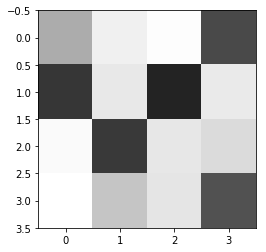

In [22]:
#newimg = np.array(grayVector2rgbImage(np.abs(sv1[::-1])))
newimg = np.array(grayVector2rgbImage(np.abs(sv1)))
print(type(newimg))
maxnormofpic = np.linalg.norm(newimg)
print(maxnormofpic)
show(newimg/np.max(np.abs(newimg)))

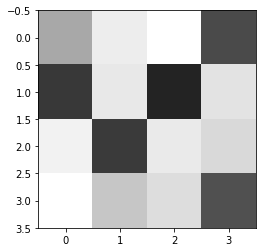

In [23]:
show(read(img))

In [25]:
import pickle as pkl
pkl.dump(RES,open('res_depth_3','wb'))

In [28]:
qasm_simulator = Aer.get_backend('qasm_simulator')
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [32]:
from qiskit.providers.aer import noise
from qiskit.aqua import QuantumInstance
device = provider.get_backend('ibmq_vigo') # ibmq_16_melbourne
properties = device.properties()
noise_model = noise.device.basic_device_noise_model(properties)
shots=10000
quantum_instance = QuantumInstance(qasm_simulator, shots=shots, noise_model=noise_model)

2019-09-14 12:13:32,045:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.9.0
Backend: 'qasm_simulator (AerProvider)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'cu1', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'ccx', 'swap', 'multiplexer', 'snapshot', 'unitary', 'reset', 'initialize', 'kraus', 'roerror'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': None, 'optimization_level': None}
RunConfig(max_credits=10, shots=10000)
{'timeout': None}
{}
{'noise_model': NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'cx', 'id', 'u2', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 

In [63]:
var_form = RYRZ(num_qubits, depth = 3)
parameters = RES['opt_params']

q = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
c = QuantumCircuit(q, cr)
c += var_form.construct_circuit(parameters, q=q)
c.measure(q, cr)
print(c)
result = quantum_instance.execute(c)
result.to_dict()

          ┌─────────────────┐ ┌─────────────┐ ░                       »
q3_0: |0>─┤ U3(-2.0306,0,0) ├─┤ U1(0.35445) ├─░───────────────■────■──»
         ┌┴─────────────────┴┐├─────────────┤ ░ ┌──────────┐┌─┴─┐  │  »
q3_1: |0>┤ U3(-0.091075,0,0) ├┤ U1(-2.8763) ├─░─┤ U2(0,pi) ├┤ X ├──┼──»
         └┬─────────────────┬┘├─────────────┤ ░ ├──────────┤└───┘┌─┴─┐»
q3_2: |0>─┤ U3(-1.8735,0,0) ├─┤ U1(-1.9646) ├─░─┤ U2(0,pi) ├─────┤ X ├»
          └┬────────────────┤ ├─────────────┤ ░ ├──────────┤     └───┘»
q3_3: |0>──┤ U3(1.5872,0,0) ├─┤ U1(0.45836) ├─░─┤ U2(0,pi) ├──────────»
           └────────────────┘ └─────────────┘ ░ └──────────┘          »
 c2_0: 0 ═════════════════════════════════════════════════════════════»
                                                                      »
 c2_1: 0 ═════════════════════════════════════════════════════════════»
                                                                      »
 c2_2: 0 ═══════════════════════════════════════════════════════

{'results': [{'header': {'creg_sizes': [['c2', 4]],
    'memory_slots': 4,
    'name': 'circuit31873',
    'clbit_labels': [['c2', 0], ['c2', 1], ['c2', 2], ['c2', 3]],
    'qubit_labels': [['q3', 0], ['q3', 1], ['q3', 2], ['q3', 3]],
    'n_qubits': 4,
    'qreg_sizes': [['q3', 4]]},
   'meas_level': 2,
   'status': 'DONE',
   'shots': 10000,
   'success': True,
   'data': {'counts': {'0x1': 897,
     '0x6': 178,
     '0xa': 873,
     '0x7': 772,
     '0x9': 239,
     '0xb': 731,
     '0x0': 535,
     '0x3': 288,
     '0x5': 785,
     '0x8': 922,
     '0x2': 906,
     '0xf': 245,
     '0x4': 205,
     '0xd': 641,
     '0xe': 808,
     '0xc': 975}},
   'metadata': {'measure_sampling': True,
    'method': 'density_matrix',
    'parallel_shots': 1,
    'parallel_state_update': 4},
   'seed_simulator': 2932926036,
   'time_taken': 0.070861454}],
 'date': '2019-09-14T12:34:23.740242+00:00',
 'status': 'COMPLETED',
 'qobj_id': '3aa1fc3d-7ca4-49f1-8574-6e716baf37a3',
 'success': True,
 'job_

In [65]:

print(result.get_counts())

{'0001': 897, '0110': 178, '1010': 873, '0111': 772, '1001': 239, '1011': 731, '0000': 535, '0011': 288, '0101': 785, '1000': 922, '0010': 906, '1111': 245, '0100': 205, '1101': 641, '1110': 808, '1100': 975}
